In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
import soundfile
from glob import glob
import librosa.display
import IPython.display as ipd 
import seaborn as sns 
from collections import Counter 
from sklearn.model_selection import train_test_split  
from scipy.signal import lfilter 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:

import warnings
  
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

import os
Root = "/content/drive/MyDrive/Speech" 
os.chdir(Root)

In [5]:
ls

'=1.23.0'    Actor_05/   Actor_10/   Actor_15/   Actor_20/   my_dir/
 Actor_01/   Actor_06/   Actor_11/   Actor_16/   Actor_21/
 Actor_02/   Actor_07/   Actor_12/   Actor_17/   Actor_22/
 Actor_03/   Actor_08/   Actor_13/   Actor_18/   Actor_23/
 Actor_04/   Actor_09/   Actor_14/   Actor_19/   Actor_24/


In [6]:
Emotion = {'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [7]:
audio_files = glob("/content/drive/MyDrive/Speech/*/*.wav")

In [8]:
data = pd.DataFrame() 
data['Path'] = [] 
data['Emotion'] = [] 
data

,Path,Emotion


In [9]:
Emotions = []  
path = [] 
gender = []
for i in audio_files:  
  
  path.append(i)  
  p = int(str(i)[58])
  if(p%2==0): 
    gender.append('female') 
    # Emotions.append('female_' + Emotion[str(i)[45:47]]) 
  else: 
    gender.append('male')
    # Emotions.append('male_' + Emotion[str(i)[45:47]])  
  Emotions.append( Emotion[str(i)[45:47]]) 
data['Path'] = path 
data['Emotion'] = Emotions  
data['Gender'] = gender 
# data['gender'] = gender

In [10]:
data

,Path,Emotion,Gender
0,/content/drive/MyDrive/Speech/Actor_21/03-01-0...,calm,male
1,/content/drive/MyDrive/Speech/Actor_21/03-01-0...,neutral,male
2,/content/drive/MyDrive/Speech/Actor_21/03-01-0...,neutral,male
3,/content/drive/MyDrive/Speech/Actor_21/03-01-0...,calm,male
4,/content/drive/MyDrive/Speech/Actor_21/03-01-0...,calm,male
...,...,...,...
1435,/content/drive/MyDrive/Speech/Actor_03/03-01-0...,fearful,male
1436,/content/drive/MyDrive/Speech/Actor_03/03-01-0...,disgust,male
1437,/content/drive/MyDrive/Speech/Actor_03/03-01-0...,disgust,male
1438,/content/drive/MyDrive/Speech/Actor_03/03-01-0...,disgust,male


In [11]:
Y = pd.DataFrame(data['Emotion'], columns = ['Emotion']) 
Y

,Emotion
0,calm
1,neutral
2,neutral
3,calm
4,calm
...,...
1435,fearful
1436,disgust
1437,disgust
1438,disgust


In [12]:
Y_one_hot_encoded = pd.get_dummies(Y , columns = ['Emotion']) 
Y_one_hot_encoded.head()

,Emotion_angry,Emotion_calm,Emotion_disgust,Emotion_fearful,Emotion_happy,Emotion_neutral,Emotion_sad,Emotion_surprised
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [13]:
Encodings_emotion = {}
l = list(Y['Emotion'].unique())
l.sort()  
for i in range(len(l)): 
  Encodings_emotion[l[i]] = i 
print(Encodings_emotion)

{'angry': 0, 'calm': 1, 'disgust': 2, 'fearful': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprised': 7}


In [14]:
for i in range(len(Y)): 
  Y['Emotion'][i] = Encodings_emotion[Y['Emotion'][i]] 
Y

,Emotion
0,1
1,5
2,5
3,1
4,1
...,...
1435,3
1436,2
1437,2
1438,2


In [15]:
def training_testing_splitting(X , Y , random_state = 7): 
  X_train , X_test , Y_train , Y_test = train_test_split(X  , Y ,test_size  = 0.3 ,  random_state = random_state)  
  return X_train ,X_test , Y_train , Y_test 

In [16]:
# model_info = pd.DataFrame() 
# model_info['Feature_extraction_method']  = []
# model_info['Model'] = [] 
# result = pd.DataFrame()  

# result['Training Accuracy' ] = [] 
# result['Testing Accuracy'] = [] 
# result['Precision'] = [] 
# result['Recall'] = [] 
# result['F1-score'] = [] 
# result

## EDA

<BarContainer object of 8 artists>

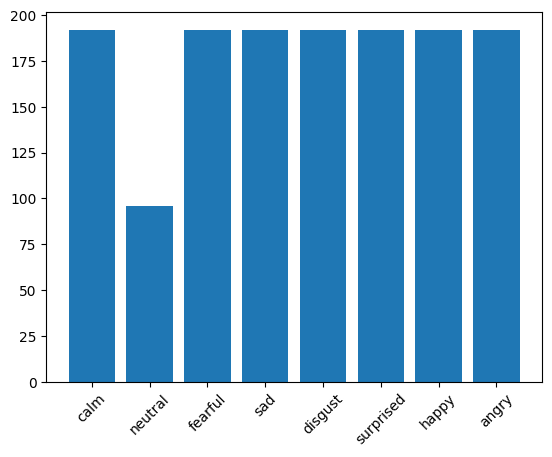

In [17]:
k = Counter(data['Emotion']) 
plt.xticks(rotation=45)
plt.bar(k.keys() , k.values()) 

In [18]:
def plot_(file , emotion):  
  X , sample_rate = librosa.load(file) 
  mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
  # audio wave
  plt.figure(figsize=(20, 15))
  plt.subplot(3,1,1)
  librosa.display.waveshow(X, sr=sample_rate)
  plt.title('Audio sampled at ' + str(sample_rate) + "Hz for " + str(emotion)) 
  plt.show() 

  # MFCC
  plt.figure(figsize=(16, 10))
  plt.subplot(3,1,1)
  librosa.display.specshow(mfcc, x_axis='time')
  plt.ylabel('MFCC')
  plt.colorbar()   
  plt.title("MFCC for "  + str(emotion))
  plt.show()

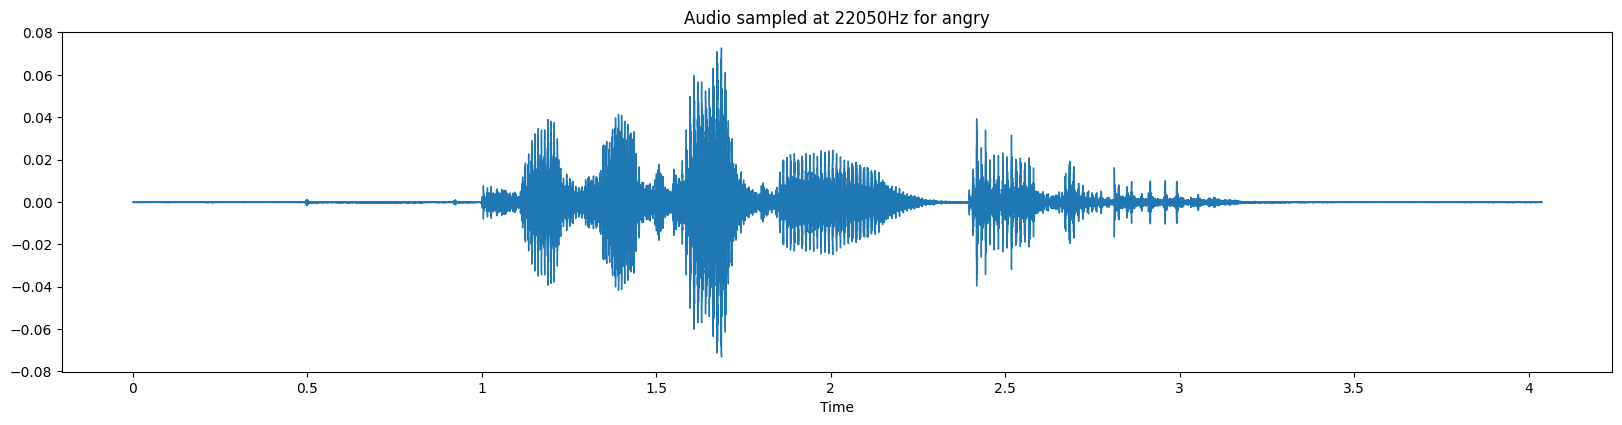

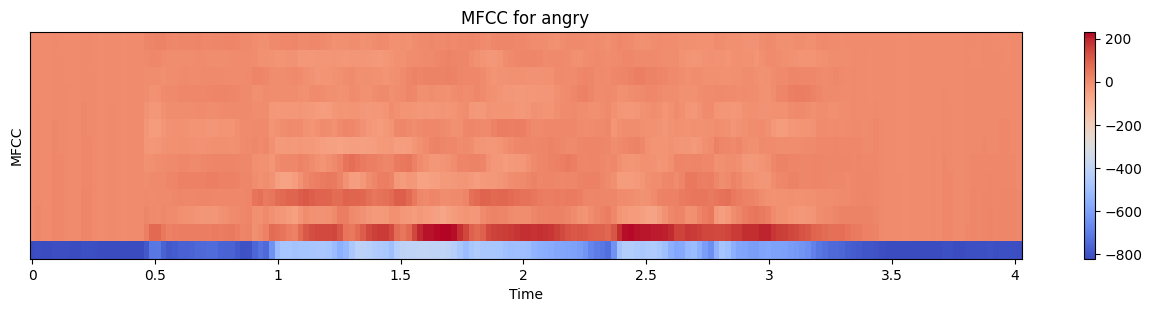

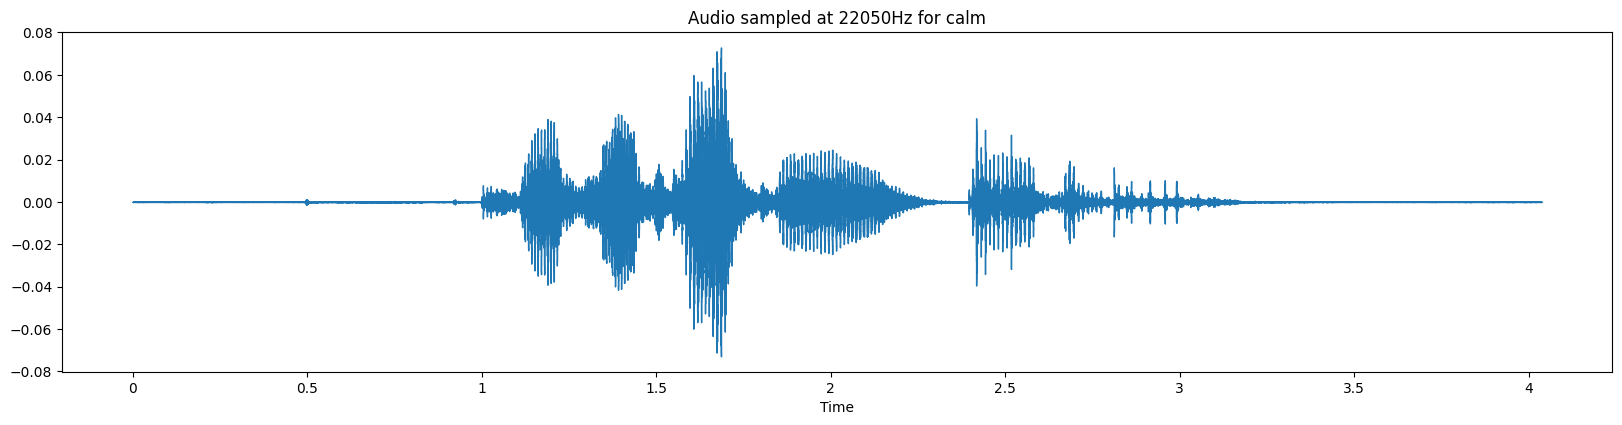

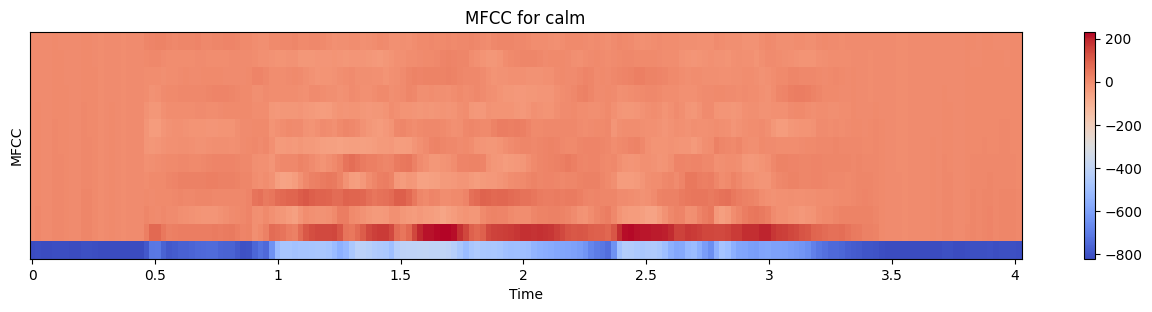

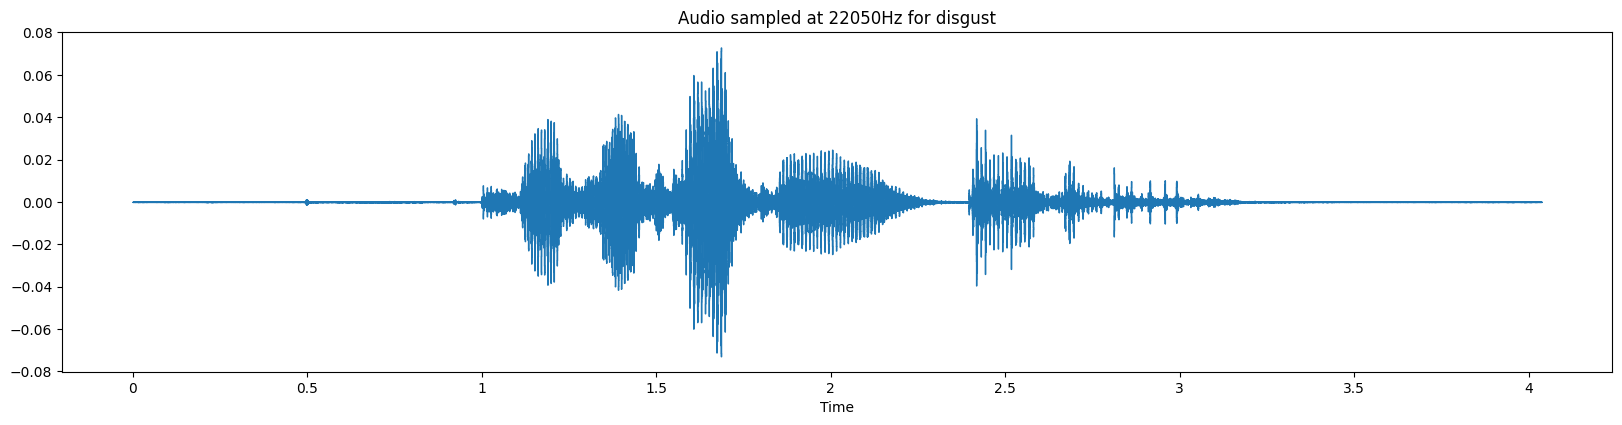

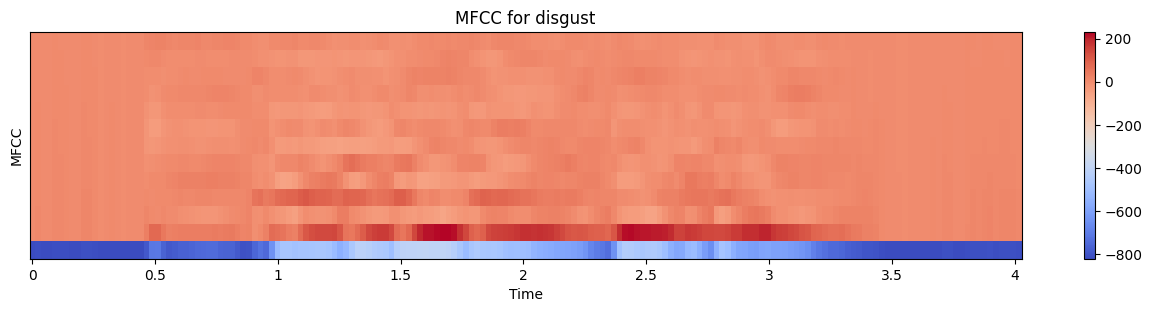

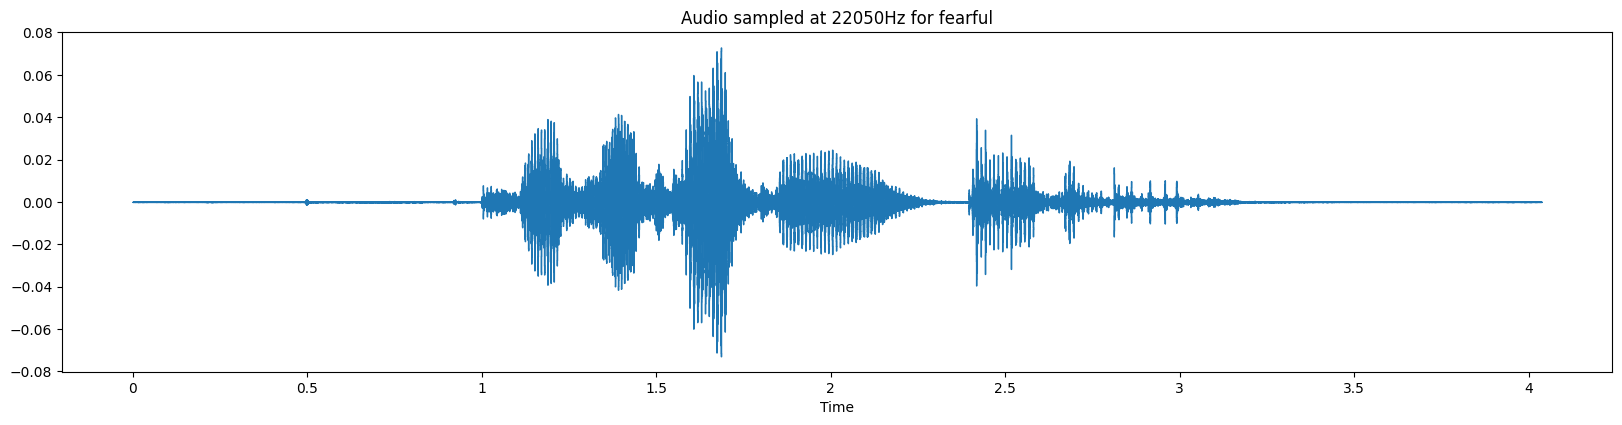

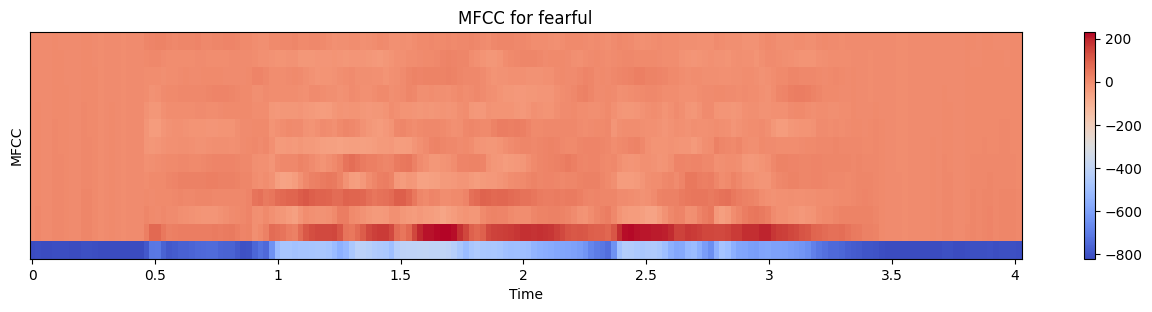

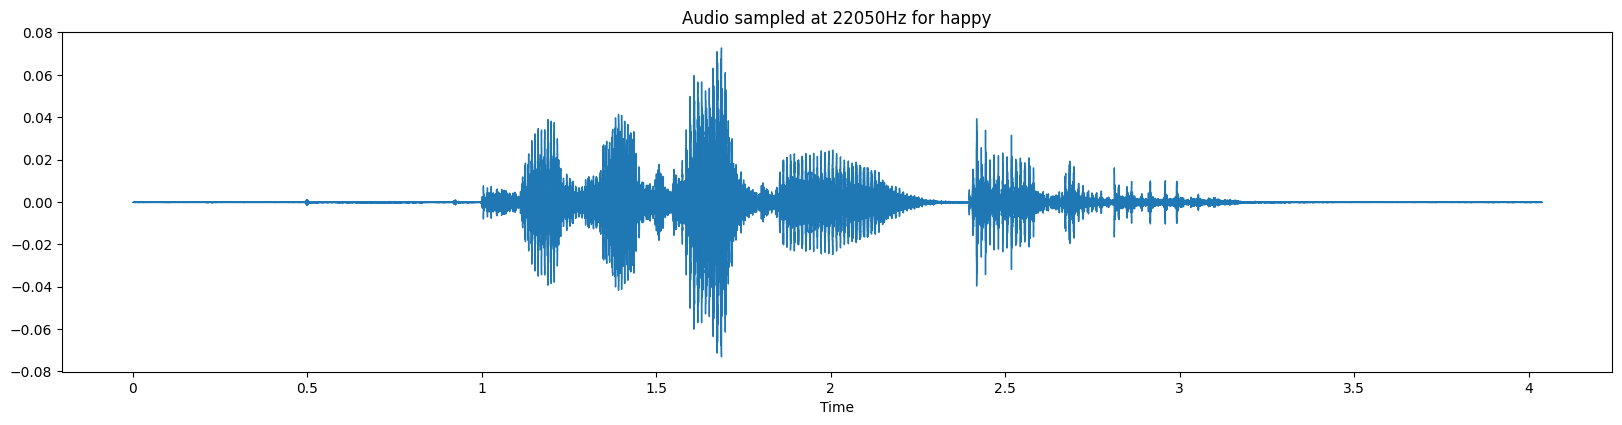

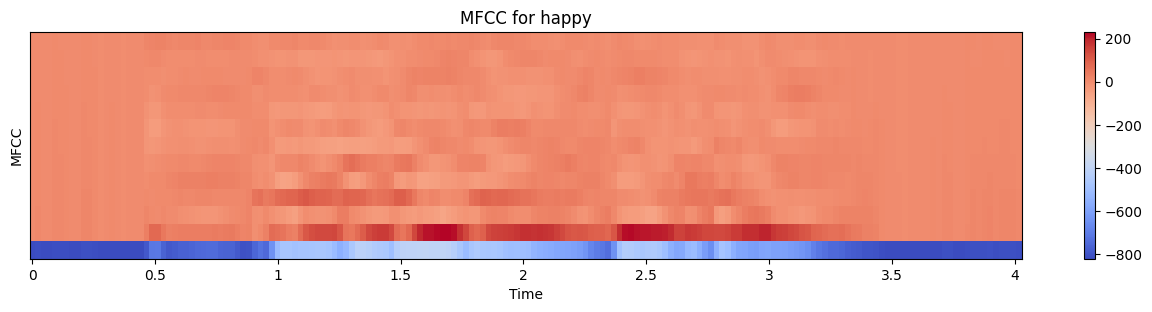

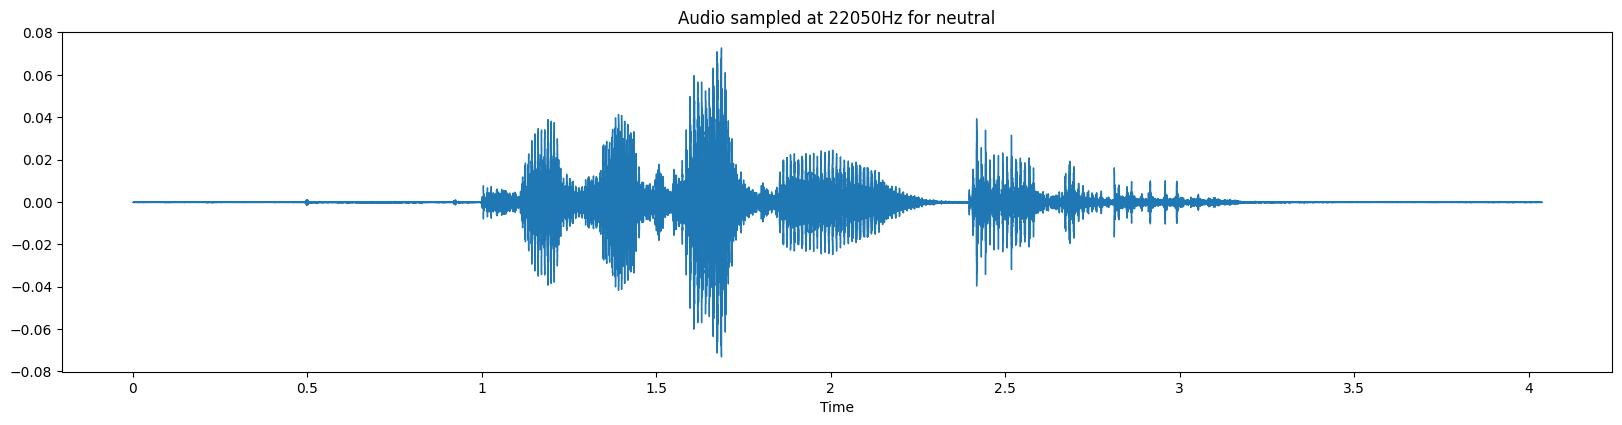

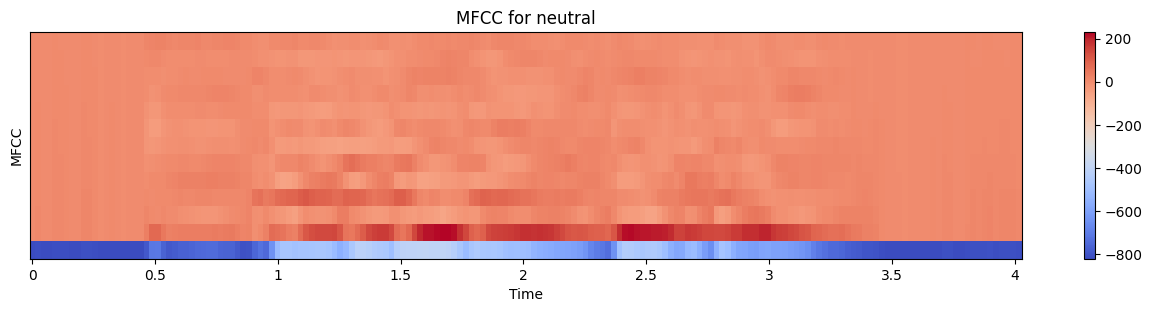

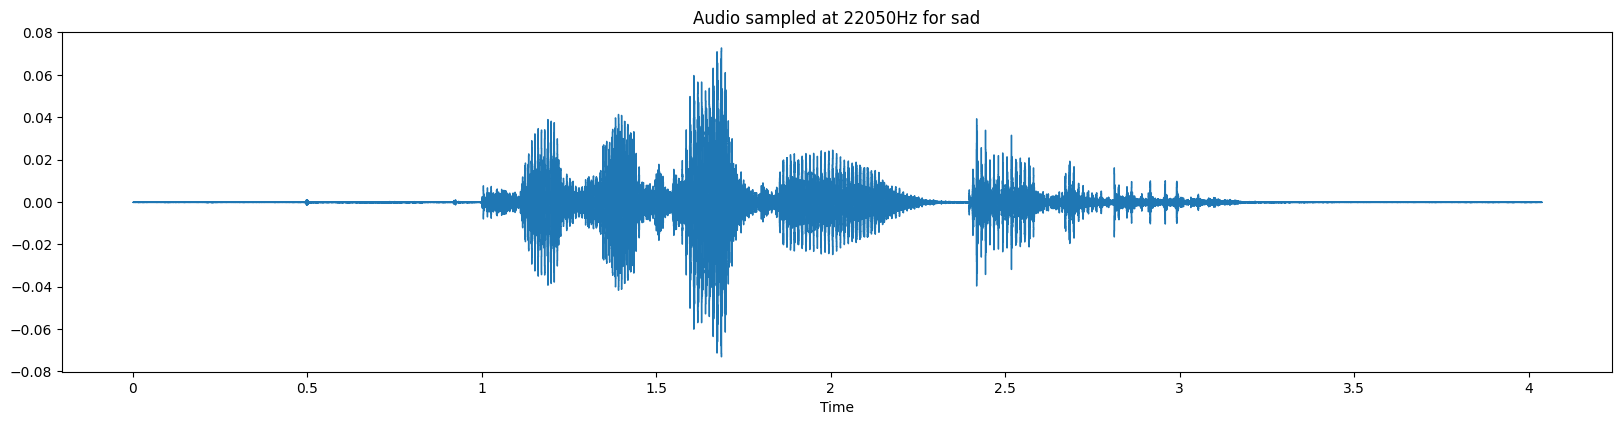

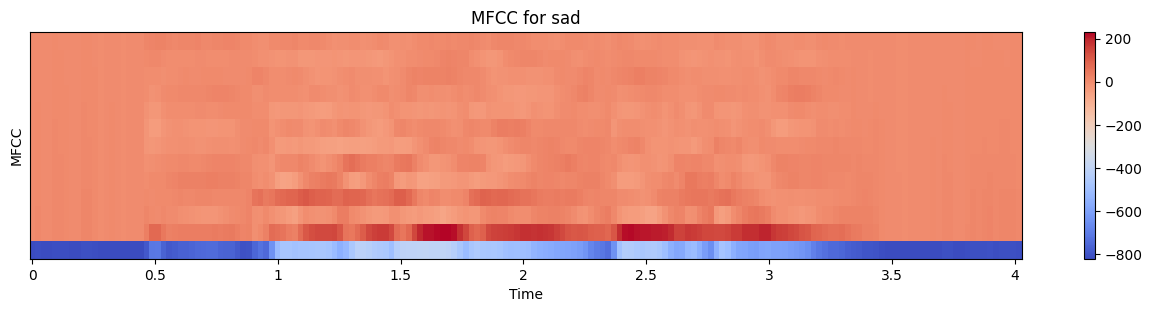

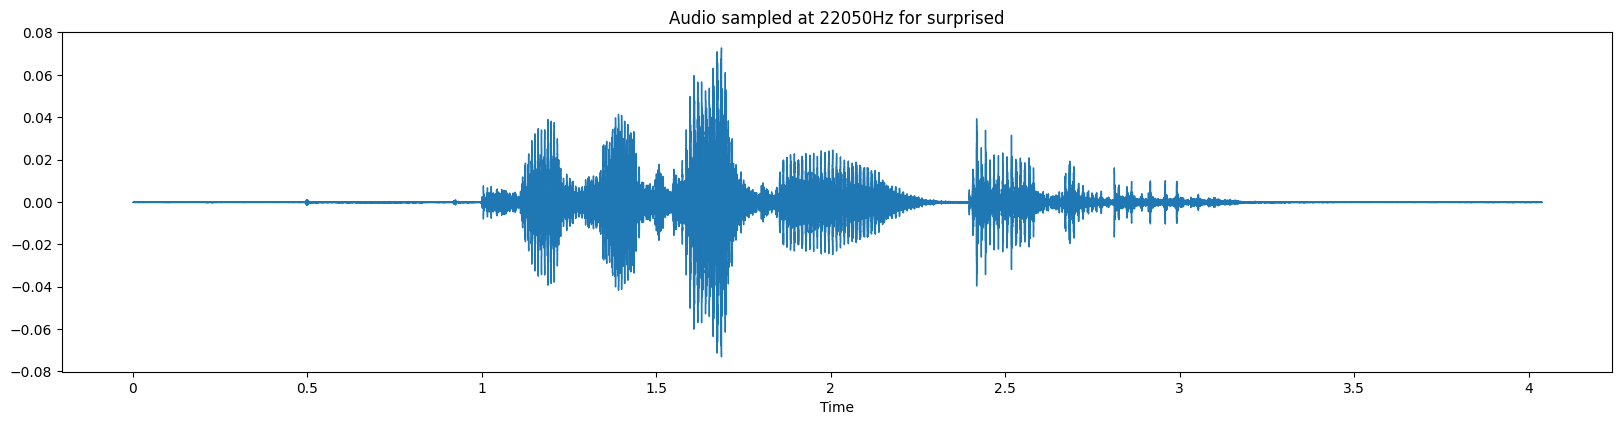

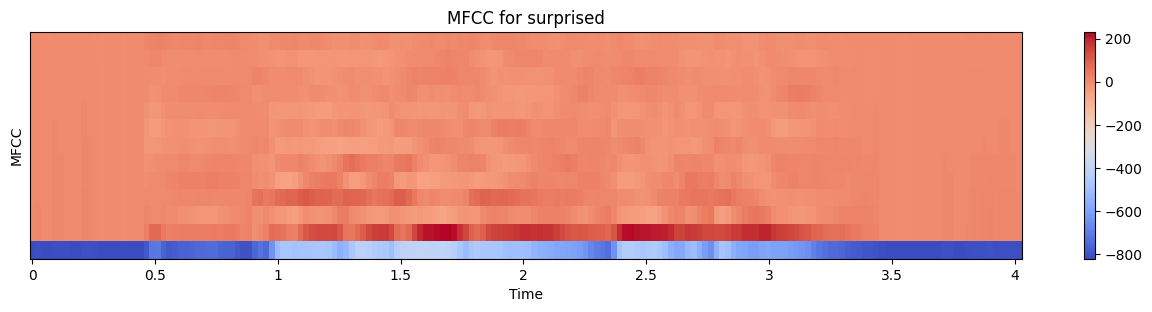

In [19]:
labels = list(Encodings_emotion.keys()  ) 
for i in labels: 
  df = data[data['Emotion'] == i  ] 
  plot_(data['Path'][0] , i )
  

In [20]:
# # CREATE LOG MEL SPECTROGRAM 
# def plot_mel():
# plt.figure(figsize=(10, 5))
# spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
# spectrogram = librosa.power_to_db(spectrogram)
# librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
# plt.title('Mel Spectrogram - Male Fearfull')
# plt.colorbar(format='%+2.0f dB');

## FEATURE EXTRACTION

In [21]:
X_mfcc = [] 
X_chroma = []
X_mel = [] 

for file in audio_files: 
  signal, sample_rate = librosa.load(file)
  
  # Extract MFCC features
  feature_info = librosa.feature.mfcc(y=signal, sr=sample_rate)
  feature_info = np.mean(feature_info.T, axis=0) 
  X_mfcc.append(np.array(feature_info.tolist())) 
  
  # Extract mel spectrogram features
  feature_info = librosa.feature.melspectrogram(y=signal, sr=sample_rate)
  feature_info = np.mean(feature_info.T, axis=0) 
  X_mel.append(np.array(feature_info.tolist())) 
  
  # Extracting chroma features  
  stft=np.abs(librosa.stft(signal))
  chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
  X_chroma.append(chroma)

X_mfcc = np.array(X_mfcc) 

X_chroma = np.array(X_chroma) 

X_mel = np.array(X_mel) 


In [22]:
pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.0 MB/s eta 0:00:00


In [23]:
print(X_mfcc.shape , X_chroma.shape , X_mel.shape)

(1440, 20) (1440, 12) (1440, 128)


## TRAINING THE MODEL FOR MFCC FEATURES

In [24]:
X_train , X_test , Y_train , Y_test = training_testing_splitting(X_mfcc , Y_one_hot_encoded )

In [25]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [26]:
y_train = np.array(Y_train)
y_test = np.array(Y_test) 
# y_val = np.array(Y_val)

In [27]:
y_train = np.argmax(y_train , axis = 1) 
y_test = np.argmax(y_test , axis  = 1)   
# y_val = np.argmax(y_val , axis = 1)

### ANN

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch  
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


In [29]:
# model = keras.Sequential()
# model.add(Dense( 32, input_dim= 20 , activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(32, activation='relu')) 
# model.add(Dense( 16, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train , Y_train , epochs = 1000 , batch_size = 64 , validation_data = (X_test , Y_test)) 

# print(model.evaluate(x = X_test , y = Y_test))

In [30]:
# print(best_hps.values)

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch



# Define the tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=32, max_value=512, step=16),
                           input_shape=(20,),
                           activation=hp.Choice('activation1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.05)))

    # Add hidden layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=10)
    for i in range(num_layers):
        model.add(layers.Dense(units=hp.Int(f'units{i+2}', min_value=16 , max_value=512, step=8),
                               activation=hp.Choice(f'activation{i+2}', values=['relu', 'tanh', 'sigmoid'])))
        model.add(layers.Dropout(rate=hp.Float(f'dropout{i+2}', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units= 8  , activation='softmax'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    elif optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 50)

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='my_project')

# Search for the best hyperparameters
tuner.search(x=X_train, y=Y_train,
             epochs= 50 ,
             validation_data=(X_test, Y_test),
             callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)

# Build the model with the best hyperparameters
model = build_model(best_hps)

# Train the model on the full dataset
history = model.fit(x=X_train, y=Y_train,
                    epochs=1000,
                    batch_size=32,
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x=X_test, y=Y_test)
print('Test accuracy:', test_acc)


Epoch 1/1000
32/32 [==============================] - 1s 11ms/step - loss: 1.9941 - accuracy: 0.2302 - val_loss: 1.6814 - val_accuracy: 0.3773
Epoch 2/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.6800 - accuracy: 0.3532 - val_loss: 1.5680 - val_accuracy: 0.4028
Epoch 3/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.6179 - accuracy: 0.3740 - val_loss: 1.5170 - val_accuracy: 0.4120
Epoch 4/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.4900 - accuracy: 0.4196 - val_loss: 1.4588 - val_accuracy: 0.4560
Epoch 5/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.4755 - accuracy: 0.4365 - val_loss: 1.3883 - val_accuracy: 0.4676
Epoch 6/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.3939 - accuracy: 0.4673 - val_loss: 1.3784 - val_accuracy: 0.4931
Epoch 7/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.3687 - accuracy: 0.4861 - val_loss: 1.3479 - val_accuracy: 0.5093
Epoch

In [32]:
Y_pred = model.predict(X_test) 
Y_pred = np.argmax(Y_pred , axis = 1)


14/14 [==============================] - 0s 2ms/step


In [33]:
print(best_hps.values)

{'units1': 256, 'activation1': 'relu', 'dropout1': 0.4, 'units2': 64, 'activation2': 'relu', 'dropout2': 0.30000000000000004, 'learning_rate': 0.01, 'num_layers': 1, 'optimizer': 'adam'}


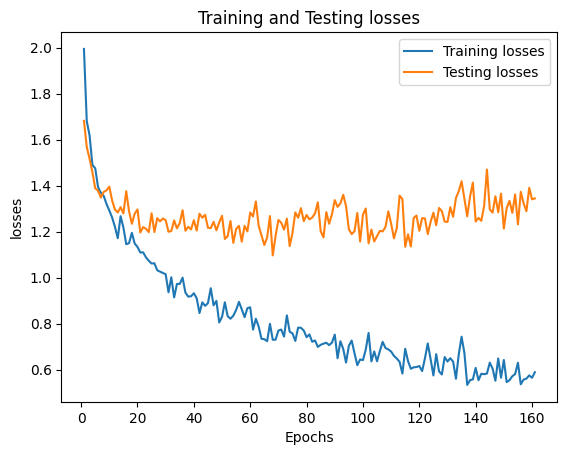

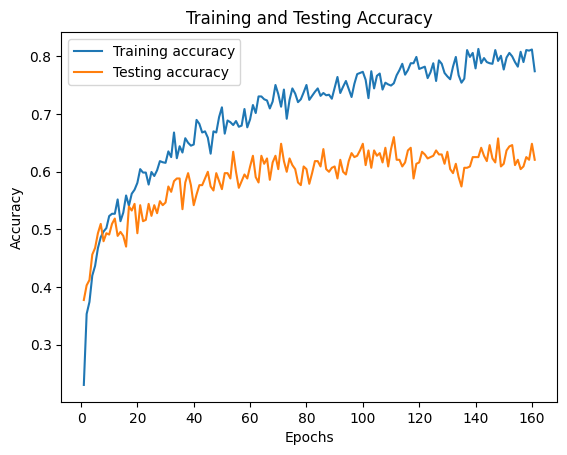

In [34]:
import matplotlib.pyplot as plt

# Train and test losses
train_losses = history.history['loss']
test_losses = history.history['val_loss']

# Train and test accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_losses) + 1)

# Plot losses
plt.plot(epochs, train_losses, label='Training losses')
plt.plot(epochs, test_losses , label='Testing losses')
plt.title('Training and Testing losses')
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.legend()

# Show plot
plt.show()

# Plot accuracy
plt.plot(epochs, train_acc , label='Training accuracy')
plt.plot(epochs, test_acc,  label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


In [35]:
y_test 

array([4, 5, 6, 3, 2, 7, 4, 3, 3, 6, 3, 2, 3, 7, 4, 4, 1, 2, 1, 0, 1, 5,
       1, 4, 3, 6, 4, 6, 4, 7, 7, 1, 1, 3, 0, 0, 3, 1, 6, 7, 4, 6, 1, 0,
       6, 0, 6, 3, 3, 2, 0, 3, 3, 7, 7, 0, 4, 3, 2, 0, 4, 6, 2, 2, 1, 7,
       0, 2, 2, 1, 3, 3, 7, 1, 1, 7, 7, 3, 4, 3, 7, 2, 7, 7, 6, 0, 1, 7,
       7, 6, 2, 1, 3, 7, 6, 2, 0, 3, 3, 2, 7, 5, 1, 2, 2, 4, 6, 3, 1, 1,
       4, 0, 7, 1, 3, 3, 7, 4, 5, 2, 0, 5, 0, 7, 0, 4, 6, 6, 5, 1, 3, 7,
       5, 1, 6, 0, 1, 2, 7, 6, 7, 5, 0, 7, 0, 2, 2, 0, 2, 3, 4, 1, 7, 7,
       4, 0, 2, 0, 2, 0, 6, 1, 4, 1, 3, 3, 5, 5, 6, 0, 6, 7, 0, 7, 2, 2,
       0, 0, 6, 3, 4, 5, 6, 2, 6, 2, 3, 6, 2, 0, 6, 2, 1, 5, 6, 2, 7, 2,
       0, 0, 4, 7, 7, 4, 3, 1, 3, 3, 7, 7, 1, 1, 1, 1, 4, 2, 3, 4, 5, 4,
       0, 1, 0, 7, 1, 0, 3, 7, 4, 1, 3, 0, 3, 4, 2, 2, 7, 1, 3, 0, 2, 0,
       1, 0, 5, 6, 0, 1, 1, 0, 0, 6, 1, 3, 7, 2, 6, 7, 4, 6, 7, 7, 3, 3,
       3, 0, 0, 0, 3, 7, 3, 1, 7, 7, 2, 6, 6, 4, 3, 5, 3, 1, 3, 3, 4, 5,
       2, 1, 6, 3, 6, 5, 6, 2, 1, 5, 7, 2, 4, 6, 3,

In [36]:
Y_pred

array([3, 5, 7, 3, 0, 3, 4, 6, 3, 3, 7, 2, 6, 7, 4, 4, 6, 7, 6, 2, 5, 7,
       1, 4, 3, 3, 4, 6, 4, 4, 6, 1, 3, 3, 0, 3, 3, 1, 6, 7, 4, 6, 1, 3,
       6, 3, 1, 3, 3, 7, 0, 3, 3, 3, 7, 0, 1, 3, 2, 7, 7, 6, 2, 2, 1, 1,
       2, 7, 7, 5, 3, 3, 7, 6, 1, 7, 7, 3, 4, 4, 7, 2, 3, 7, 6, 0, 5, 1,
       6, 6, 1, 0, 3, 7, 6, 0, 7, 3, 3, 2, 7, 6, 1, 4, 2, 4, 6, 3, 1, 1,
       4, 0, 7, 1, 3, 3, 6, 4, 5, 2, 0, 5, 2, 7, 2, 4, 3, 6, 5, 1, 3, 3,
       5, 6, 6, 0, 1, 1, 7, 6, 7, 5, 7, 7, 0, 2, 5, 0, 3, 3, 4, 1, 7, 2,
       4, 0, 7, 3, 2, 7, 3, 5, 4, 1, 3, 3, 5, 5, 6, 0, 6, 7, 2, 7, 6, 2,
       0, 0, 6, 3, 4, 5, 4, 2, 7, 3, 7, 6, 0, 5, 3, 5, 1, 1, 6, 2, 7, 7,
       0, 3, 4, 2, 7, 3, 3, 1, 7, 3, 7, 4, 3, 1, 1, 1, 4, 5, 3, 4, 5, 5,
       0, 1, 2, 7, 1, 0, 6, 6, 4, 1, 6, 3, 3, 4, 2, 7, 1, 5, 3, 7, 5, 0,
       1, 4, 5, 6, 0, 3, 1, 1, 0, 5, 1, 3, 7, 2, 7, 7, 4, 3, 2, 7, 3, 3,
       3, 7, 4, 0, 3, 7, 3, 5, 7, 7, 2, 6, 3, 4, 7, 5, 3, 1, 3, 6, 7, 5,
       2, 1, 6, 3, 6, 5, 6, 2, 3, 1, 7, 2, 7, 7, 3,

In [37]:
# y_test: true labels, Y_pred: predicted labels
cm = confusion_matrix(y_test, Y_pred)
cr = classification_report(y_test, Y_pred)
acc = accuracy_score(y_test, Y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[28  1  9  7  3  2  0  6]
 [ 2 38  2  5  0  8  5  0]
 [ 4  4 27  3  2  5  3  9]
 [ 1  1  1 50  1  0  6  4]
 [ 1  1  0  9 33  2  1  5]
 [ 0  2  0  0  0 20  2  1]
 [ 0  1  0  8  4  6 33  5]
 [ 2  3  3  4  3  3  4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.50      0.60        56
           1       0.75      0.63      0.68        60
           2       0.64      0.47      0.55        57
           3       0.58      0.78      0.67        64
           4       0.72      0.63      0.67        52
           5       0.43      0.80      0.56        25
           6       0.61      0.58      0.59        57
           7       0.57      0.64      0.60        61

    accuracy                           0.62       432
   macro avg       0.63      0.63      0.62       432
weighted avg       0.64      0.62      0.62       432

Accuracy:  0.6203703703703703


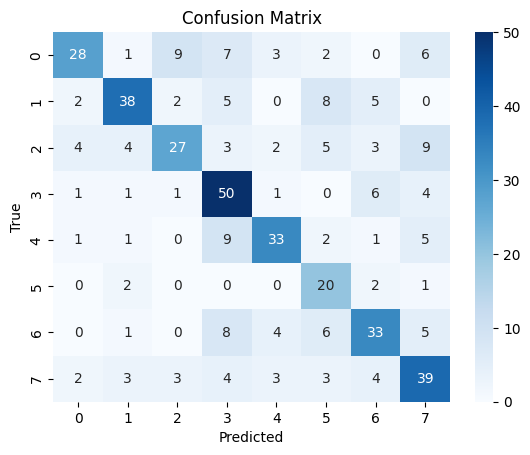

In [38]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [39]:
train_loss , train_acc  = model.evaluate(x = X_train , y = Y_train ) 
test_loss , test_acc = model.evaluate( x = X_test , y = Y_test ) 

14/14 [==============================] - 0s 2ms/step - loss: 1.3445 - accuracy: 0.6204


In [40]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.9394841194152832
Testing accuracy is :  0.6203703880310059


### SVM

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


svm_model = SVC( random_state = 8)

# Define the hyperparameter space to explore
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
# Define the grid search object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)


print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.6967592592592593
Training accuracy:  1.0
Best hyperparameters:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [42]:
y_pred.shape

(432,)

In [43]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[38  0  5  5  2  1  0  5]
 [ 1 50  0  2  0  6  1  0]
 [ 5  1 36  4  4  1  2  4]
 [ 4  4  2 45  5  0  3  1]
 [ 0  2  2  4 40  0  3  1]
 [ 0  2  0  1  1 18  2  1]
 [ 0  3  1  8  5  4 36  0]
 [ 3  5  1  3  3  2  6 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71        56
           1       0.75      0.83      0.79        60
           2       0.77      0.63      0.69        57
           3       0.62      0.70      0.66        64
           4       0.67      0.77      0.71        52
           5       0.56      0.72      0.63        25
           6       0.68      0.63      0.65        57
           7       0.76      0.62      0.68        61

    accuracy                           0.70       432
   macro avg       0.69      0.70      0.69       432
weighted avg       0.70      0.70      0.70       432

Accuracy:  0.6967592592592593


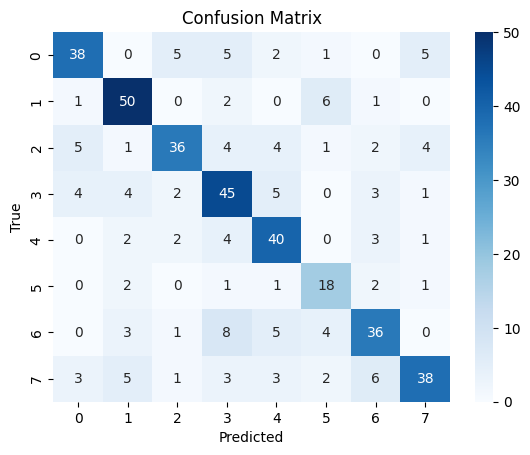

In [44]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [45]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  1.0
Testing accuracy is :  0.6967592592592593


### DECISION TREE CLASSIFIER

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter space to explore
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.3819444444444444
Training accuracy:  0.9583333333333334
Best hyperparameters:  {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [47]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[30  1  6  5  4  0  2  8]
 [ 1 25  2  3  5 11 10  3]
 [ 4  6 18  6  9  1  7  6]
 [ 5  3  9 16 13  3  7  8]
 [ 4  2  4  6 16  0  6 14]
 [ 0  3  3  0  0 12  3  4]
 [ 0  5  6  9  6  4 20  7]
 [ 3  9  7  4  7  1  2 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.54      0.58        56
           1       0.46      0.42      0.44        60
           2       0.33      0.32      0.32        57
           3       0.33      0.25      0.28        64
           4       0.27      0.31      0.29        52
           5       0.38      0.48      0.42        25
           6       0.35      0.35      0.35        57
           7       0.36      0.46      0.40        61

    accuracy                           0.38       432
   macro avg       0.39      0.39      0.39       432
weighted avg       0.39      0.38      0.38       432

Accuracy:  0.3819444444444444


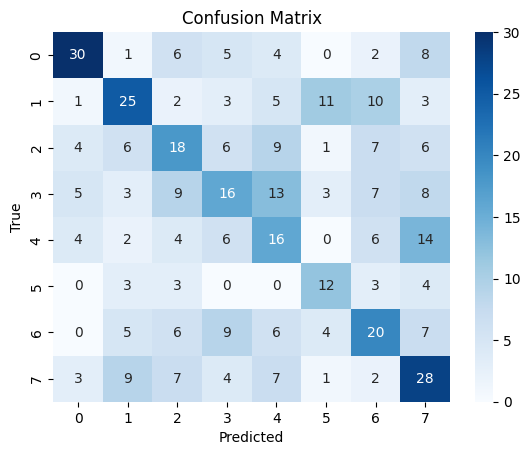

In [48]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [49]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.9583333333333334
Testing accuracy is :  0.3819444444444444


### RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the random forest classifier model
rf_model = RandomForestClassifier(random_state=8)

# Define the hyperparameter space to explore
param_grid = {
    'n_estimators': [ 100 , 200 , 500 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 10, 15, 20],
    'criterion' :['gini', 'entropy']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.6273148148148148
Training accuracy:  1.0
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 500}


In [ ]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[32  1  9  6  0  0  1  7]
 [ 1 48  2  0  0  5  2  2]
 [ 4  6 32  1  2  1  7  4]
 [ 7  2  5 34  3  0  8  5]
 [ 1  3  2  5 36  0  1  4]
 [ 0  6  0  0  0 14  4  1]
 [ 0  6  1  6  2  4 36  2]
 [ 5  5  1  2  4  0  5 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.57      0.60        56
           1       0.62      0.80      0.70        60
           2       0.62      0.56      0.59        57
           3       0.63      0.53      0.58        64
           4       0.77      0.69      0.73        52
           5       0.58      0.56      0.57        25
           6       0.56      0.63      0.60        57
           7       0.61      0.64      0.62        61

    accuracy                           0.63       432
   macro avg       0.63      0.62      0.62       432
weighted avg       0.63      0.63      0.63       432

Accuracy:  0.6273148148148148


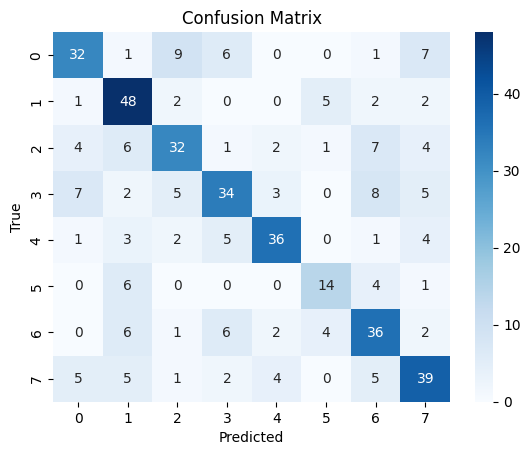

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

### BAGGING 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# # Generate some random data
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=8)

# # Split data into train and test sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# # Define the base estimator to use
base_estimator = DecisionTreeClassifier(random_state=8)

# Define the hyperparameter space to explore
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    'base_estimator__max_depth': [5, 10, 15],
}

# Define the bagging classifier to use
bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=8)

# Define the grid search object
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.5694444444444444
Training accuracy:  1.0
Best hyperparameters:  {'base_estimator__max_depth': 15, 'max_features': 0.5, 'max_samples': 0.9, 'n_estimators': 200}


In [ ]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[29  2 11  5  0  0  0  9]
 [ 1 48  2  0  0  5  2  2]
 [ 4  5 29  2  5  1  7  4]
 [ 6  5  4 31  6  0  8  4]
 [ 0  4  3  6 32  0  1  6]
 [ 0  8  0  0  0 11  5  1]
 [ 0 10  1  7  3  3 30  3]
 [ 2  5  3  3  6  1  5 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.52      0.59        56
           1       0.55      0.80      0.65        60
           2       0.55      0.51      0.53        57
           3       0.57      0.48      0.53        64
           4       0.62      0.62      0.62        52
           5       0.52      0.44      0.48        25
           6       0.52      0.53      0.52        57
           7       0.55      0.59      0.57        61

    accuracy                           0.57       432
   macro avg       0.57      0.56      0.56       432
weighted avg       0.57      0.57      0.57       432

Accuracy:  0.5694444444444444


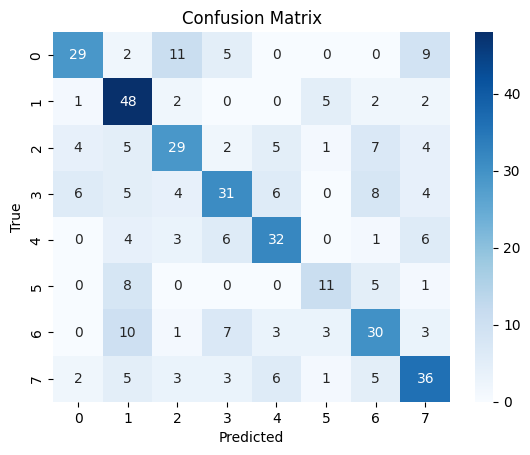

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter space to explore
param_grid = {
    'n_neighbors': [2,3, 4,5,6, 7,8, 9 , 10  ],
    'p': [1, 2],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.5995370370370371
Training accuracy:  0.8115079365079365
Best hyperparameters:  {'n_neighbors': 2, 'p': 2}


In [ ]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[20  0  3  3  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 1 25  0  0  0  3  0  1  0  0  0  0  0  0  0  0]
 [ 5  5 13  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  4  2 20  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 3  1  1  1 19  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 1  5  2  5  4  2  6  0  0  0  0  0  0  0  0  0]
 [ 5  4  1  4  3  1  3 12  0  0  0  0  0  0  0  0]
 [ 2  0  1  0  0  0  0  0 17  0  2  0  4  2  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  3  3 23  0  0  1  0  0]
 [ 0  0  1  1  0  0  2  1  4  2  6 14  0  1  1  0]
 [ 0  0  0  0  0  0  0  0  2  1  0  3 18  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  6  0  1]
 [ 0  0  0  0  0  0  0  0  1  4  1  6  2  5 12  1]
 [ 0  0  0  0  0  0  0  0  2  0  4  1  2  4  1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.59        28
           1       0.51      0.

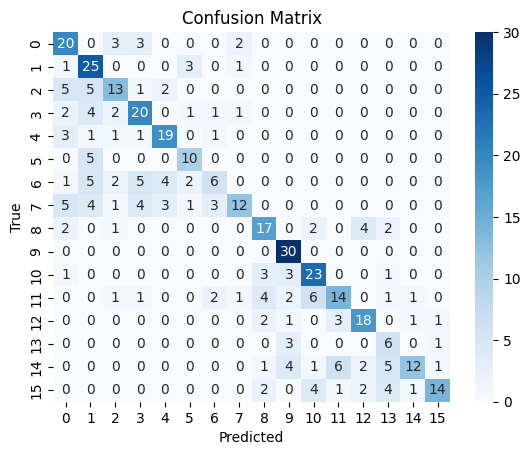

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

## TRAINING THE MODEL FOR MEL SPECTROGRAM FEATURES

In [51]:
X_train , X_test , Y_train , Y_test = training_testing_splitting(X_mel , Y_one_hot_encoded )

In [52]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [53]:
y_train = np.array(Y_train)
y_test = np.array(Y_test) 
# y_val = np.array(Y_val)

In [54]:
y_train = np.argmax(y_train , axis = 1) 
y_test = np.argmax(y_test , axis  = 1)   
# y_val = np.argmax(y_val , axis = 1)

### ANN

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch  
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


In [65]:
# model = keras.Sequential()
# model.add(Dense( 32, input_dim= 20 , activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(32, activation='relu')) 
# model.add(Dense( 16, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train , Y_train , epochs = 1000 , batch_size = 64 , validation_data = (X_test , Y_test)) 

# print(model.evaluate(x = X_test , y = Y_test))

In [66]:
# print(best_hps.values)

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch



# Define the tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=32, max_value=512, step=16),
                           input_shape=( 128 ,),
                           activation=hp.Choice('activation1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.05)))

    # Add hidden layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=10)
    for i in range(num_layers):
        model.add(layers.Dense(units=hp.Int(f'units{i+2}', min_value=16 , max_value=512, step=8),
                               activation=hp.Choice(f'activation{i+2}', values=['relu', 'tanh', 'sigmoid'])))
        model.add(layers.Dropout(rate=hp.Float(f'dropout{i+2}', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units= 8  , activation='softmax'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    elif optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 50)

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='my_project')

# Search for the best hyperparameters
tuner.search(x=X_train, y=Y_train,
             epochs= 50 ,
             validation_data=(X_test, Y_test),
             callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)

# Build the model with the best hyperparameters
model = build_model(best_hps)

# Train the model on the full dataset
history = model.fit(x=X_train, y=Y_train,
                    epochs=1000,
                    batch_size=32,
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x=X_test, y=Y_test)
print('Test accuracy:', test_acc)


Epoch 1/1000
32/32 [==============================] - 1s 10ms/step - loss: 2.0046 - accuracy: 0.2073 - val_loss: 1.8923 - val_accuracy: 0.2917
Epoch 2/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.8484 - accuracy: 0.2827 - val_loss: 1.8746 - val_accuracy: 0.2593
Epoch 3/1000
32/32 [==============================] - 0s 6ms/step - loss: 1.8036 - accuracy: 0.3016 - val_loss: 1.8206 - val_accuracy: 0.3032
Epoch 4/1000
32/32 [==============================] - 0s 6ms/step - loss: 1.7815 - accuracy: 0.3155 - val_loss: 1.8505 - val_accuracy: 0.2986
Epoch 5/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.7609 - accuracy: 0.3125 - val_loss: 1.9410 - val_accuracy: 0.2963
Epoch 6/1000
32/32 [==============================] - 0s 6ms/step - loss: 1.7720 - accuracy: 0.3214 - val_loss: 1.8895 - val_accuracy: 0.3310
Epoch 7/1000
32/32 [==============================] - 0s 6ms/step - loss: 1.6830 - accuracy: 0.3482 - val_loss: 2.0268 - val_accuracy: 0.3472
Epoch

#### h

In [68]:
Y_pred = model.predict(X_test) 
Y_pred = np.argmax(Y_pred , axis = 1)


14/14 [==============================] - 0s 2ms/step


In [69]:
print(best_hps.values)

{'units1': 32, 'activation1': 'tanh', 'dropout1': 0.2, 'units2': 512, 'activation2': 'relu', 'dropout2': 0.4, 'learning_rate': 0.01, 'num_layers': 1, 'optimizer': 'adam'}


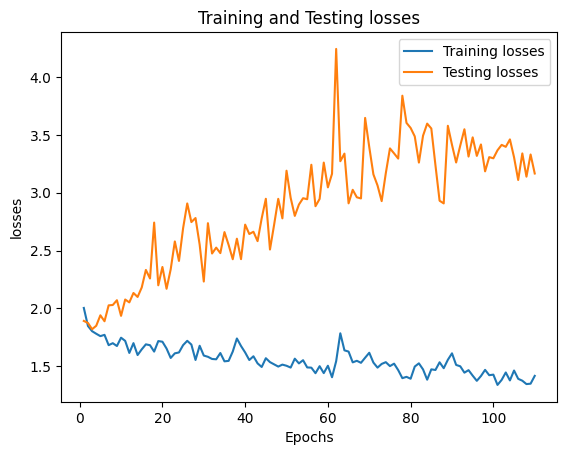

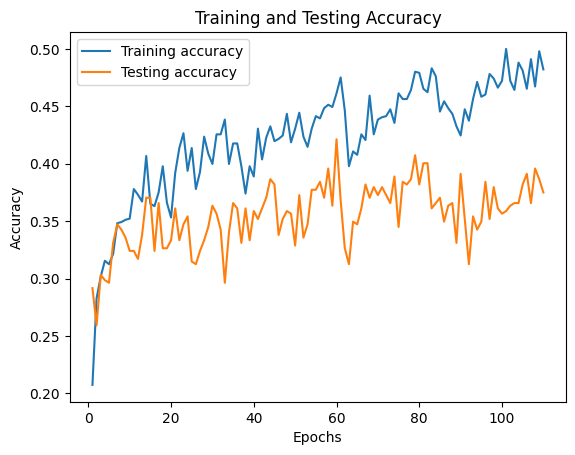

In [70]:
import matplotlib.pyplot as plt

# Train and test losses
train_losses = history.history['loss']
test_losses = history.history['val_loss']

# Train and test accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_losses) + 1)

# Plot losses
plt.plot(epochs, train_losses, label='Training losses')
plt.plot(epochs, test_losses , label='Testing losses')
plt.title('Training and Testing losses')
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.legend()

# Show plot
plt.show()

# Plot accuracy
plt.plot(epochs, train_acc , label='Training accuracy')
plt.plot(epochs, test_acc,  label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


In [71]:
y_test 

array([4, 5, 6, 3, 2, 7, 4, 3, 3, 6, 3, 2, 3, 7, 4, 4, 1, 2, 1, 0, 1, 5,
       1, 4, 3, 6, 4, 6, 4, 7, 7, 1, 1, 3, 0, 0, 3, 1, 6, 7, 4, 6, 1, 0,
       6, 0, 6, 3, 3, 2, 0, 3, 3, 7, 7, 0, 4, 3, 2, 0, 4, 6, 2, 2, 1, 7,
       0, 2, 2, 1, 3, 3, 7, 1, 1, 7, 7, 3, 4, 3, 7, 2, 7, 7, 6, 0, 1, 7,
       7, 6, 2, 1, 3, 7, 6, 2, 0, 3, 3, 2, 7, 5, 1, 2, 2, 4, 6, 3, 1, 1,
       4, 0, 7, 1, 3, 3, 7, 4, 5, 2, 0, 5, 0, 7, 0, 4, 6, 6, 5, 1, 3, 7,
       5, 1, 6, 0, 1, 2, 7, 6, 7, 5, 0, 7, 0, 2, 2, 0, 2, 3, 4, 1, 7, 7,
       4, 0, 2, 0, 2, 0, 6, 1, 4, 1, 3, 3, 5, 5, 6, 0, 6, 7, 0, 7, 2, 2,
       0, 0, 6, 3, 4, 5, 6, 2, 6, 2, 3, 6, 2, 0, 6, 2, 1, 5, 6, 2, 7, 2,
       0, 0, 4, 7, 7, 4, 3, 1, 3, 3, 7, 7, 1, 1, 1, 1, 4, 2, 3, 4, 5, 4,
       0, 1, 0, 7, 1, 0, 3, 7, 4, 1, 3, 0, 3, 4, 2, 2, 7, 1, 3, 0, 2, 0,
       1, 0, 5, 6, 0, 1, 1, 0, 0, 6, 1, 3, 7, 2, 6, 7, 4, 6, 7, 7, 3, 3,
       3, 0, 0, 0, 3, 7, 3, 1, 7, 7, 2, 6, 6, 4, 3, 5, 3, 1, 3, 3, 4, 5,
       2, 1, 6, 3, 6, 5, 6, 2, 1, 5, 7, 2, 4, 6, 3,

In [72]:
Y_pred

array([0, 1, 2, 2, 2, 3, 7, 2, 3, 3, 2, 7, 6, 7, 3, 7, 1, 7, 2, 7, 1, 1,
       1, 7, 3, 3, 0, 6, 0, 7, 6, 6, 1, 7, 0, 4, 3, 6, 2, 7, 4, 2, 1, 0,
       1, 7, 6, 3, 1, 4, 0, 0, 3, 7, 7, 0, 1, 3, 7, 7, 2, 6, 7, 2, 1, 7,
       2, 7, 7, 1, 2, 4, 0, 1, 2, 7, 7, 2, 4, 3, 7, 2, 3, 7, 6, 0, 1, 6,
       7, 1, 2, 1, 2, 2, 1, 2, 7, 2, 2, 2, 6, 2, 1, 7, 2, 7, 2, 0, 1, 1,
       2, 0, 7, 1, 3, 4, 7, 4, 7, 7, 0, 6, 7, 7, 0, 4, 6, 1, 6, 1, 4, 6,
       1, 1, 1, 2, 2, 1, 1, 7, 0, 1, 7, 7, 0, 1, 2, 0, 6, 3, 3, 2, 7, 7,
       2, 3, 2, 0, 2, 0, 2, 1, 7, 1, 7, 7, 1, 6, 1, 7, 2, 3, 7, 2, 1, 0,
       0, 4, 1, 0, 7, 1, 2, 7, 1, 6, 3, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2,
       0, 3, 2, 7, 7, 3, 1, 1, 0, 3, 4, 1, 1, 2, 2, 6, 4, 1, 3, 1, 2, 6,
       0, 6, 0, 7, 1, 6, 7, 2, 2, 1, 6, 0, 7, 7, 2, 1, 6, 1, 7, 1, 6, 0,
       2, 7, 1, 2, 0, 1, 1, 7, 0, 1, 6, 3, 6, 7, 1, 7, 2, 4, 7, 7, 3, 7,
       4, 2, 6, 7, 3, 7, 0, 1, 1, 2, 2, 3, 3, 0, 2, 1, 3, 6, 2, 7, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 7, 1, 1, 7, 0, 7, 1, 3,

In [73]:
# y_test: true labels, Y_pred: predicted labels
cm = confusion_matrix(y_test, Y_pred)
cr = classification_report(y_test, Y_pred)
acc = accuracy_score(y_test, Y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[29  2  4  2  2  0  2 15]
 [ 0 36 14  1  0  0  9  0]
 [ 2 10 21  0  1  0  7 16]
 [ 6  6 10 21  4  0  3 14]
 [ 9  5  6  3 13  0  2 14]
 [ 0 14  4  0  0  0  6  1]
 [ 0 25 10  5  2  0 10  5]
 [ 5  5  6  4  2  0  7 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.52      0.54        56
           1       0.35      0.60      0.44        60
           2       0.28      0.37      0.32        57
           3       0.58      0.33      0.42        64
           4       0.54      0.25      0.34        52
           5       0.00      0.00      0.00        25
           6       0.22      0.18      0.19        57
           7       0.33      0.52      0.41        61

    accuracy                           0.38       432
   macro avg       0.36      0.35      0.33       432
weighted avg       0.39      0.38      0.36       432

Accuracy:  0.375


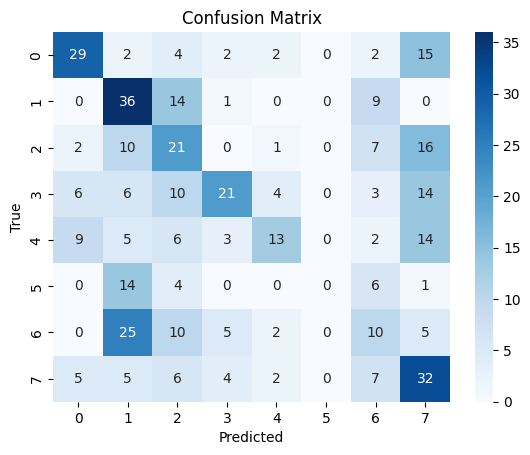

In [74]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [75]:
train_loss , train_acc  = model.evaluate(x = X_train , y = Y_train ) 
test_loss , test_acc = model.evaluate( x = X_test , y = Y_test ) 

14/14 [==============================] - 0s 2ms/step - loss: 3.1659 - accuracy: 0.3750


In [76]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.5466269850730896
Testing accuracy is :  0.375


### SVM

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


svm_model = SVC( random_state = 8)

# Define the hyperparameter space to explore
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
# Define the grid search object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)


print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.3472222222222222
Training accuracy:  0.6001984126984127
Best hyperparameters:  {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}


In [60]:
y_pred.shape

(432,)

In [61]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[27  1 11  7  3  0  6  1]
 [ 0 56  3  1  0  0  0  0]
 [ 2 18 21  3  3  0  6  4]
 [12 11  5 12 10  0  5  9]
 [ 8  8  3  4 14  1  7  7]
 [ 1 22  1  0  0  0  0  1]
 [ 0 34  1  7  4  2  9  0]
 [ 4 12  9  6  8  0 11 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49        56
           1       0.35      0.93      0.50        60
           2       0.39      0.37      0.38        57
           3       0.30      0.19      0.23        64
           4       0.33      0.27      0.30        52
           5       0.00      0.00      0.00        25
           6       0.20      0.16      0.18        57
           7       0.33      0.18      0.23        61

    accuracy                           0.35       432
   macro avg       0.30      0.32      0.29       432
weighted avg       0.32      0.35      0.31       432

Accuracy:  0.3472222222222222


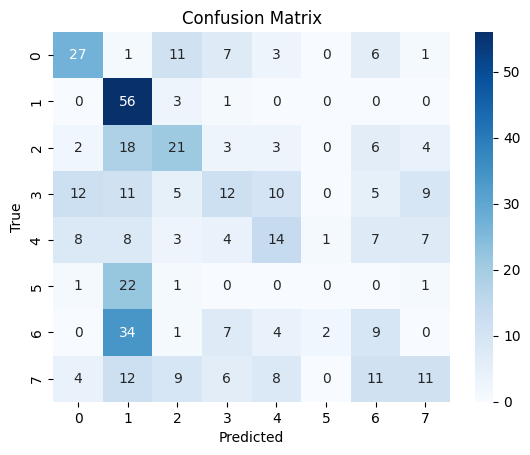

In [62]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [63]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.6001984126984127
Testing accuracy is :  0.3472222222222222


### DECISION TREE CLASSIFIER

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter space to explore
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.28703703703703703
Training accuracy:  0.8690476190476191
Best hyperparameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [78]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[21  2  8 11  6  0  1  7]
 [ 2 31  5  2  2 10  8  0]
 [ 7  9 14  5  5  6  3  8]
 [14  5 11 14  6  2  8  4]
 [ 6  2  7 10 17  0  4  6]
 [ 1 11  3  1  1  5  2  1]
 [ 3 12  8 10  6  6  9  3]
 [ 7  6  6  5 15  7  2 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.38      0.36        56
           1       0.40      0.52      0.45        60
           2       0.23      0.25      0.24        57
           3       0.24      0.22      0.23        64
           4       0.29      0.33      0.31        52
           5       0.14      0.20      0.16        25
           6       0.24      0.16      0.19        57
           7       0.31      0.21      0.25        61

    accuracy                           0.29       432
   macro avg       0.27      0.28      0.27       432
weighted avg       0.28      0.29      0.28       432

Accuracy:  0.28703703703703703


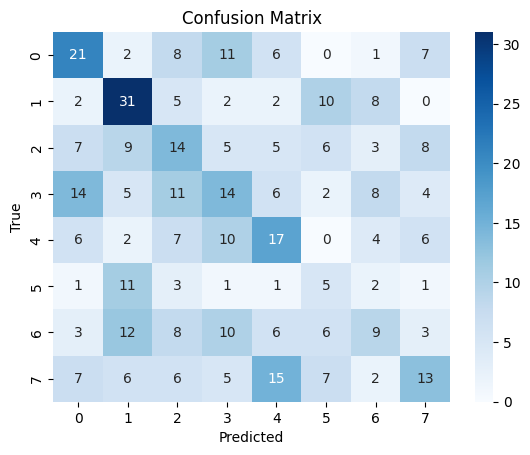

In [79]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [80]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.8690476190476191
Testing accuracy is :  0.28703703703703703


### RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the random forest classifier model
rf_model = RandomForestClassifier(random_state=8)

# Define the hyperparameter space to explore
param_grid = {
    'n_estimators': [ 100 , 200 , 500 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 10, 15, 20],
    'criterion' :['gini', 'entropy']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.5138888888888888
Training accuracy:  1.0
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 500}


In [ ]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[31  0  9  0  3  0  1 12]
 [ 0 49  4  0  1  2  4  0]
 [ 2 10 32  0  7  0  2  4]
 [ 7  4 10 27  6  1  7  2]
 [ 3  1  4  6 28  1  3  6]
 [ 0  8  2  0  1  9  3  2]
 [ 0 17  4  3  1  4 21  7]
 [ 1  7  7  3 14  3  1 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.55      0.62        56
           1       0.51      0.82      0.63        60
           2       0.44      0.56      0.50        57
           3       0.69      0.42      0.52        64
           4       0.46      0.54      0.50        52
           5       0.45      0.36      0.40        25
           6       0.50      0.37      0.42        57
           7       0.43      0.41      0.42        61

    accuracy                           0.51       432
   macro avg       0.52      0.50      0.50       432
weighted avg       0.53      0.51      0.51       432

Accuracy:  0.5138888888888888


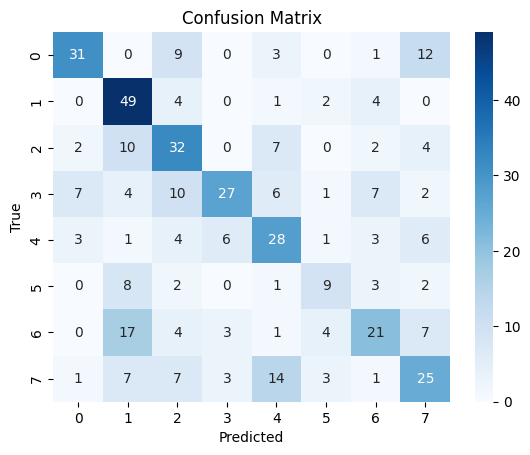

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

### BAGGING 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# # Generate some random data
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=8)

# # Split data into train and test sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# # Define the base estimator to use
base_estimator = DecisionTreeClassifier(random_state=8)

# Define the hyperparameter space to explore
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    'base_estimator__max_depth': [5, 10, 15],
}

# Define the bagging classifier to use
bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=8)

# Define the grid search object
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


In [ ]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [ ]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter space to explore
param_grid = {
    'n_neighbors': [2,3, 4,5,6, 7,8, 9 , 10  ],
    'p': [1, 2],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.4050925925925926
Training accuracy:  0.7261904761904762
Best hyperparameters:  {'n_neighbors': 2, 'p': 1}


In [ ]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[35  1  7  4  8  0  0  1]
 [ 2 42  4  5  1  4  2  0]
 [ 2  9 33  4  2  2  5  0]
 [10 11  9 26  2  3  1  2]
 [ 5  9  9 10 15  0  2  2]
 [ 1 14  2  1  1  5  1  0]
 [ 4 22  8  3  8  5  6  1]
 [ 6  8 12 10  6  3  3 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.62      0.58        56
           1       0.36      0.70      0.48        60
           2       0.39      0.58      0.47        57
           3       0.41      0.41      0.41        64
           4       0.35      0.29      0.32        52
           5       0.23      0.20      0.21        25
           6       0.30      0.11      0.16        57
           7       0.68      0.21      0.33        61

    accuracy                           0.41       432
   macro avg       0.41      0.39      0.37       432
weighted avg       0.42      0.41      0.38       432

Accuracy:  0.4050925925925926


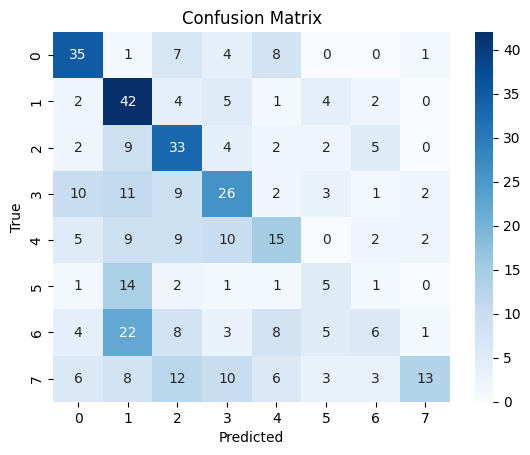

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

## TRAINING THE MODEL FOR CHROMA FEATURES

In [82]:
X_train , X_test , Y_train , Y_test = training_testing_splitting(X_chroma , Y_one_hot_encoded )

In [83]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [84]:
y_train = np.array(Y_train)
y_test = np.array(Y_test) 
# y_val = np.array(Y_val)

In [85]:
y_train = np.argmax(y_train , axis = 1) 
y_test = np.argmax(y_test , axis  = 1)   
# y_val = np.argmax(y_val , axis = 1)

### ANN

In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch  
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


In [87]:
# model = keras.Sequential()
# model.add(Dense( 32, input_dim= 20 , activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(32, activation='relu')) 
# model.add(Dense( 16, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train , Y_train , epochs = 1000 , batch_size = 64 , validation_data = (X_test , Y_test)) 

# print(model.evaluate(x = X_test , y = Y_test))

In [88]:
# print(best_hps.values)

In [90]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch



# Define the tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=32, max_value=512, step=16),
                           input_shape=(12 ,),
                           activation=hp.Choice('activation1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.05)))

    # Add hidden layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=10)
    for i in range(num_layers):
        model.add(layers.Dense(units=hp.Int(f'units{i+2}', min_value=16 , max_value=512, step=8),
                               activation=hp.Choice(f'activation{i+2}', values=['relu', 'tanh', 'sigmoid'])))
        model.add(layers.Dropout(rate=hp.Float(f'dropout{i+2}', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units= 8  , activation='softmax'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    elif optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 50)

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='my_project')

# Search for the best hyperparameters
tuner.search(x=X_train, y=Y_train,
             epochs= 50 ,
             validation_data=(X_test, Y_test),
             callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)

# Build the model with the best hyperparameters
model = build_model(best_hps)

# Train the model on the full dataset
history = model.fit(x=X_train, y=Y_train,
                    epochs=1000,
                    batch_size=32,
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x=X_test, y=Y_test)
print('Test accuracy:', test_acc)


Epoch 1/1000
32/32 [==============================] - 2s 19ms/step - loss: 2.1479 - accuracy: 0.1379 - val_loss: 2.0339 - val_accuracy: 0.1690
Epoch 2/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.0593 - accuracy: 0.1518 - val_loss: 2.0309 - val_accuracy: 0.1667
Epoch 3/1000
32/32 [==============================] - 0s 9ms/step - loss: 2.0388 - accuracy: 0.1687 - val_loss: 2.0315 - val_accuracy: 0.1736
Epoch 4/1000
32/32 [==============================] - 0s 9ms/step - loss: 2.0219 - accuracy: 0.1786 - val_loss: 2.0294 - val_accuracy: 0.1713
Epoch 5/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.0181 - accuracy: 0.1667 - val_loss: 2.0299 - val_accuracy: 0.1921
Epoch 6/1000
32/32 [==============================] - 0s 7ms/step - loss: 2.0291 - accuracy: 0.1696 - val_loss: 2.0211 - val_accuracy: 0.1782
Epoch 7/1000
32/32 [==============================] - 0s 10ms/step - loss: 2.0100 - accuracy: 0.1825 - val_loss: 2.0298 - val_accuracy: 0.1667
Epoc

#### h

In [91]:
Y_pred = model.predict(X_test) 
Y_pred = np.argmax(Y_pred , axis = 1)


14/14 [==============================] - 0s 2ms/step


In [92]:
print(best_hps.values)

{'units1': 256, 'activation1': 'relu', 'dropout1': 0.4, 'units2': 64, 'activation2': 'relu', 'dropout2': 0.30000000000000004, 'learning_rate': 0.01, 'num_layers': 1, 'optimizer': 'adam'}


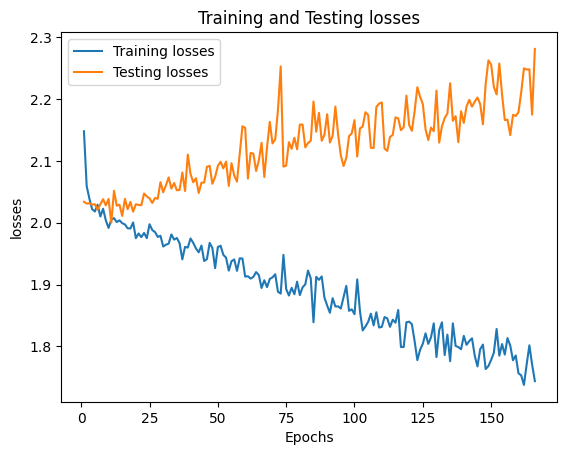

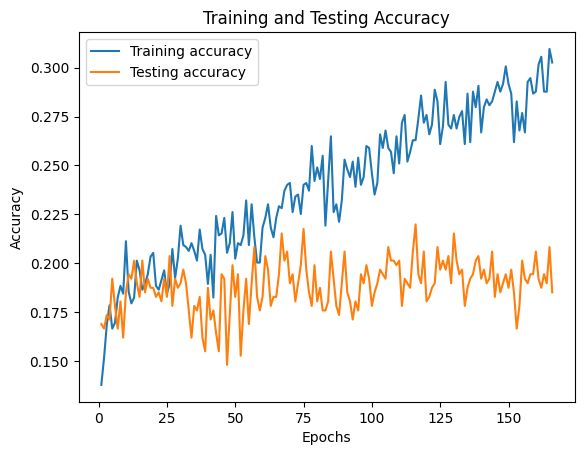

In [93]:
import matplotlib.pyplot as plt

# Train and test losses
train_losses = history.history['loss']
test_losses = history.history['val_loss']

# Train and test accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_losses) + 1)

# Plot losses
plt.plot(epochs, train_losses, label='Training losses')
plt.plot(epochs, test_losses , label='Testing losses')
plt.title('Training and Testing losses')
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.legend()

# Show plot
plt.show()

# Plot accuracy
plt.plot(epochs, train_acc , label='Training accuracy')
plt.plot(epochs, test_acc,  label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


In [94]:
y_test 

array([4, 5, 6, 3, 2, 7, 4, 3, 3, 6, 3, 2, 3, 7, 4, 4, 1, 2, 1, 0, 1, 5,
       1, 4, 3, 6, 4, 6, 4, 7, 7, 1, 1, 3, 0, 0, 3, 1, 6, 7, 4, 6, 1, 0,
       6, 0, 6, 3, 3, 2, 0, 3, 3, 7, 7, 0, 4, 3, 2, 0, 4, 6, 2, 2, 1, 7,
       0, 2, 2, 1, 3, 3, 7, 1, 1, 7, 7, 3, 4, 3, 7, 2, 7, 7, 6, 0, 1, 7,
       7, 6, 2, 1, 3, 7, 6, 2, 0, 3, 3, 2, 7, 5, 1, 2, 2, 4, 6, 3, 1, 1,
       4, 0, 7, 1, 3, 3, 7, 4, 5, 2, 0, 5, 0, 7, 0, 4, 6, 6, 5, 1, 3, 7,
       5, 1, 6, 0, 1, 2, 7, 6, 7, 5, 0, 7, 0, 2, 2, 0, 2, 3, 4, 1, 7, 7,
       4, 0, 2, 0, 2, 0, 6, 1, 4, 1, 3, 3, 5, 5, 6, 0, 6, 7, 0, 7, 2, 2,
       0, 0, 6, 3, 4, 5, 6, 2, 6, 2, 3, 6, 2, 0, 6, 2, 1, 5, 6, 2, 7, 2,
       0, 0, 4, 7, 7, 4, 3, 1, 3, 3, 7, 7, 1, 1, 1, 1, 4, 2, 3, 4, 5, 4,
       0, 1, 0, 7, 1, 0, 3, 7, 4, 1, 3, 0, 3, 4, 2, 2, 7, 1, 3, 0, 2, 0,
       1, 0, 5, 6, 0, 1, 1, 0, 0, 6, 1, 3, 7, 2, 6, 7, 4, 6, 7, 7, 3, 3,
       3, 0, 0, 0, 3, 7, 3, 1, 7, 7, 2, 6, 6, 4, 3, 5, 3, 1, 3, 3, 4, 5,
       2, 1, 6, 3, 6, 5, 6, 2, 1, 5, 7, 2, 4, 6, 3,

In [95]:
Y_pred

array([7, 7, 7, 6, 7, 3, 2, 7, 3, 7, 7, 1, 0, 7, 7, 7, 4, 0, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 2, 2, 7, 3, 6, 7, 6, 7, 0, 3, 7, 7, 7, 2, 7, 7, 3,
       6, 0, 6, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 3, 3, 7, 7, 7, 0, 7, 7, 7,
       7, 7, 7, 7, 3, 7, 7, 7, 2, 7, 7, 3, 0, 7, 2, 7, 7, 2, 1, 7, 7, 7,
       7, 7, 7, 3, 0, 7, 7, 7, 7, 7, 2, 6, 7, 7, 6, 4, 7, 1, 1, 6, 7, 7,
       0, 7, 7, 7, 0, 4, 5, 7, 7, 1, 7, 7, 2, 7, 0, 4, 4, 7, 4, 7, 3, 7,
       6, 0, 7, 7, 4, 7, 6, 7, 7, 7, 7, 7, 0, 7, 7, 7, 6, 7, 3, 7, 7, 3,
       7, 3, 7, 7, 7, 0, 7, 7, 7, 7, 4, 0, 0, 7, 7, 7, 7, 3, 2, 7, 7, 1,
       4, 7, 7, 3, 7, 7, 7, 7, 7, 7, 0, 4, 4, 7, 7, 6, 1, 7, 7, 7, 7, 7,
       7, 2, 7, 7, 7, 6, 7, 1, 7, 7, 2, 0, 7, 3, 4, 1, 7, 7, 6, 7, 7, 7,
       7, 1, 0, 7, 1, 7, 7, 2, 0, 7, 1, 1, 2, 3, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 0, 7, 7, 2, 7, 2, 7,
       7, 7, 7, 7, 0, 7, 4, 6, 7, 7, 7, 6, 6, 1, 7, 7, 2, 1, 2, 1, 7, 7,
       7, 0, 7, 7, 7, 6, 7, 4, 6, 7, 5, 7, 3, 7, 7,

In [96]:
# y_test: true labels, Y_pred: predicted labels
cm = confusion_matrix(y_test, Y_pred)
cr = classification_report(y_test, Y_pred)
acc = accuracy_score(y_test, Y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[ 7  3  4  2  3  0  1 36]
 [ 2 12  2  2  5  0  7 30]
 [ 4  5  2  2  4  0  5 35]
 [ 6  4  6  7  4  0  7 30]
 [ 4  5  4  5  4  0  2 28]
 [ 2  1  0  0  1  0  2 19]
 [ 2  5  1  3  3  0  5 38]
 [ 3  0  5  5  1  2  2 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.12      0.16        56
           1       0.34      0.20      0.25        60
           2       0.08      0.04      0.05        57
           3       0.27      0.11      0.16        64
           4       0.16      0.08      0.10        52
           5       0.00      0.00      0.00        25
           6       0.16      0.09      0.11        57
           7       0.17      0.70      0.27        61

    accuracy                           0.19       432
   macro avg       0.18      0.17      0.14       432
weighted avg       0.19      0.19      0.15       432

Accuracy:  0.18518518518518517


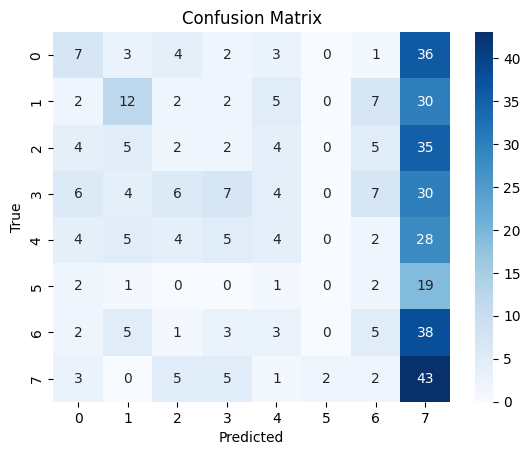

In [97]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [98]:
train_loss , train_acc  = model.evaluate(x = X_train , y = Y_train ) 
test_loss , test_acc = model.evaluate( x = X_test , y = Y_test ) 

14/14 [==============================] - 0s 3ms/step - loss: 2.2811 - accuracy: 0.1852


In [99]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.3789682686328888
Testing accuracy is :  0.18518517911434174


### SVM

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


svm_model = SVC( random_state = 8)

# Define the hyperparameter space to explore
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
# Define the grid search object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)


print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.19212962962962962
Training accuracy:  0.9037698412698413
Best hyperparameters:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [101]:
y_pred.shape

(432,)

In [102]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[17  4  6  3 11  6  3  6]
 [11 15  7 10  4  6  3  4]
 [18  6  9  4  6  2  7  5]
 [14 11  7  8 10  1  9  4]
 [ 7  6  8 11  7  3  5  5]
 [ 6  3  5  2  4  2  1  2]
 [ 7  9  8  8  6  1 13  5]
 [ 5  6  7  3 10  9  9 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.30      0.24        56
           1       0.25      0.25      0.25        60
           2       0.16      0.16      0.16        57
           3       0.16      0.12      0.14        64
           4       0.12      0.13      0.13        52
           5       0.07      0.08      0.07        25
           6       0.26      0.23      0.24        57
           7       0.28      0.20      0.23        61

    accuracy                           0.19       432
   macro avg       0.19      0.18      0.18       432
weighted avg       0.20      0.19      0.19       432

Accuracy:  0.19212962962962962


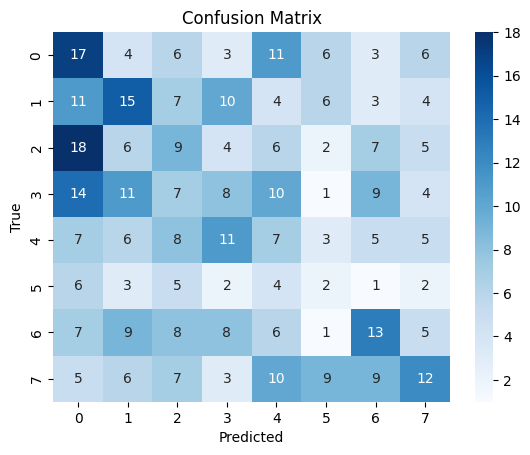

In [103]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [104]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.9037698412698413
Testing accuracy is :  0.19212962962962962


### DECISION TREE CLASSIFIER

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter space to explore
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.19675925925925927
Training accuracy:  0.2619047619047619
Best hyperparameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [106]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[13  0 14  4  0  1  4 20]
 [10  9 15  3  1  0  5 17]
 [ 9  4 23  3  0  0  6 12]
 [13  3 18  5  0  3 11 11]
 [ 7  0 15  5  1  0  7 17]
 [ 5  2  8  1  1  0  1  7]
 [ 4  4 19  3  1  0 15 11]
 [ 7  4 22  3  0  0  6 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.23      0.21        56
           1       0.35      0.15      0.21        60
           2       0.17      0.40      0.24        57
           3       0.19      0.08      0.11        64
           4       0.25      0.02      0.04        52
           5       0.00      0.00      0.00        25
           6       0.27      0.26      0.27        57
           7       0.17      0.31      0.22        61

    accuracy                           0.20       432
   macro avg       0.20      0.18      0.16       432
weighted avg       0.21      0.20      0.17       432

Accuracy:  0.19675925925925927


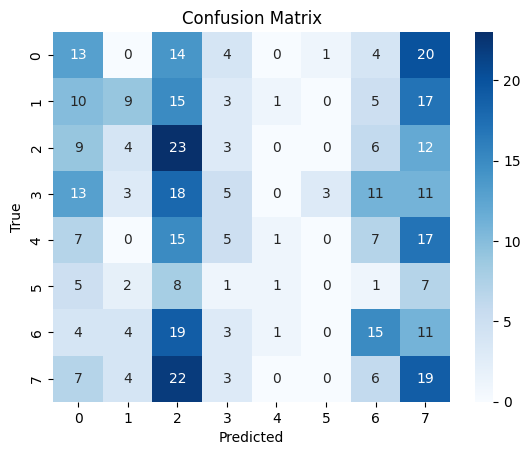

In [107]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [108]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.2619047619047619
Testing accuracy is :  0.19675925925925927


### RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the random forest classifier model
rf_model = RandomForestClassifier(random_state=8)

# Define the hyperparameter space to explore
param_grid = {
    'n_estimators': [ 100 , 200 , 500 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 10, 15, 20],
    'criterion' :['gini', 'entropy']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


In [ ]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [ ]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

### BAGGING 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# # Generate some random data
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=8)

# # Split data into train and test sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# # Define the base estimator to use
base_estimator = DecisionTreeClassifier(random_state=8)

# Define the hyperparameter space to explore
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    'base_estimator__max_depth': [5, 10, 15],
}

# Define the bagging classifier to use
bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=8)

# Define the grid search object
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


In [ ]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [ ]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

### KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter space to explore
param_grid = {
    'n_neighbors': [2,3, 4,5,6, 7,8, 9 , 10  ],
    'p': [1, 2],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.1736111111111111
Training accuracy:  0.42857142857142855
Best hyperparameters:  {'n_neighbors': 5, 'p': 1}


## COMBINED FEATURES

In [160]:
def extract_feature(file_name):
    X , sample_rate = librosa.load(file_name)
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))

    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))

    mel=np.mean(librosa.feature.melspectrogram(y = X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [161]:
X_com = []

for file in audio_files: 
  X_com.append(extract_feature(file))

X_com = np.array(X_com) 

In [162]:
X_train , X_test , Y_train , Y_test = training_testing_splitting(X_com , Y_one_hot_encoded )

In [163]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [164]:
y_train = np.array(Y_train)
y_test = np.array(Y_test) 
# y_val = np.array(Y_val)

In [165]:
y_train = np.argmax(y_train , axis = 1) 
y_test = np.argmax(y_test , axis  = 1)   
# y_val = np.argmax(y_val , axis = 1)

### ANN

In [166]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch  
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


In [167]:
# model = keras.Sequential()
# model.add(Dense( 32, input_dim= 20 , activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(32, activation='relu')) 
# model.add(Dense( 16, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train , Y_train , epochs = 1000 , batch_size = 64 , validation_data = (X_test , Y_test)) 

# print(model.evaluate(x = X_test , y = Y_test))

In [168]:
# print(best_hps.values)

In [172]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch



# Define the tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=32, max_value=512, step=16),
                           input_shape=(180,),
                           activation=hp.Choice('activation1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.05)))

    # Add hidden layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=10)
    for i in range(num_layers):
        model.add(layers.Dense(units=hp.Int(f'units{i+2}', min_value=16 , max_value=512, step=8),
                               activation=hp.Choice(f'activation{i+2}', values=['relu', 'tanh', 'sigmoid'])))
        model.add(layers.Dropout(rate=hp.Float(f'dropout{i+2}', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units= 8  , activation='softmax'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    elif optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4]))
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 50)

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='my_project')

# Search for the best hyperparameters
tuner.search(x=X_train, y=Y_train,
             epochs= 50 ,
             validation_data=(X_test, Y_test),
             callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)

# Build the model with the best hyperparameters
model = build_model(best_hps)

# Train the model on the full dataset
history = model.fit(x=X_train, y=Y_train,
                    epochs=1000,
                    batch_size=32,
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x=X_test, y=Y_test)
print('Test accuracy:', test_acc)


Epoch 1/1000
32/32 [==============================] - 2s 16ms/step - loss: 2.2123 - accuracy: 0.2520 - val_loss: 1.8264 - val_accuracy: 0.2616
Epoch 2/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.8195 - accuracy: 0.2808 - val_loss: 1.7893 - val_accuracy: 0.3079
Epoch 3/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.7849 - accuracy: 0.3016 - val_loss: 1.7107 - val_accuracy: 0.3287
Epoch 4/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.7411 - accuracy: 0.3194 - val_loss: 1.7772 - val_accuracy: 0.3102
Epoch 5/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.6975 - accuracy: 0.3254 - val_loss: 1.6641 - val_accuracy: 0.3935
Epoch 6/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.6434 - accuracy: 0.3661 - val_loss: 1.6586 - val_accuracy: 0.3727
Epoch 7/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.6122 - accuracy: 0.3760 - val_loss: 1.5882 - val_accuracy: 0.3866
Epoch

#### h

In [173]:
Y_pred = model.predict(X_test) 
Y_pred = np.argmax(Y_pred , axis = 1)


14/14 [==============================] - 0s 2ms/step


In [174]:
print(best_hps.values)

{'units1': 256, 'activation1': 'relu', 'dropout1': 0.4, 'units2': 64, 'activation2': 'relu', 'dropout2': 0.30000000000000004, 'learning_rate': 0.01, 'num_layers': 1, 'optimizer': 'adam'}


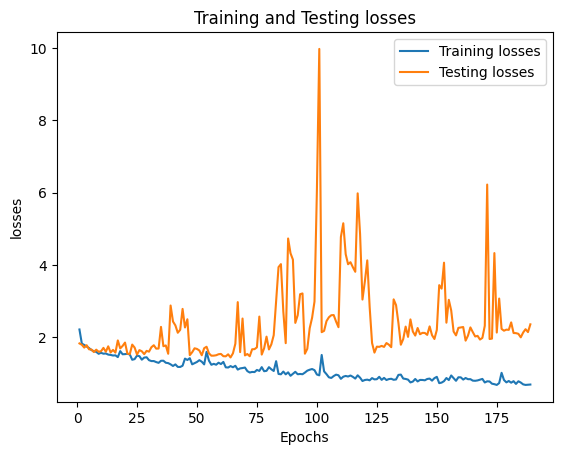

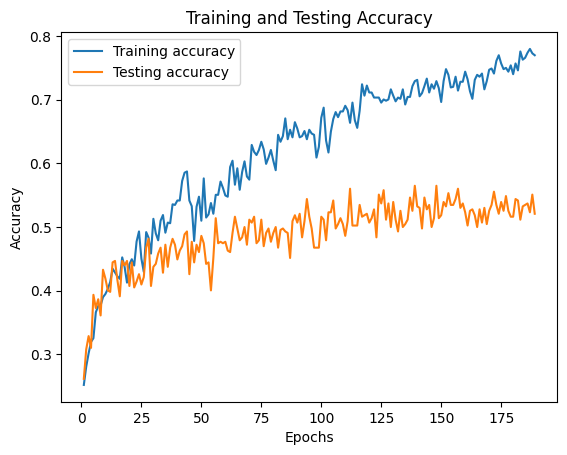

In [175]:
import matplotlib.pyplot as plt

# Train and test losses
train_losses = history.history['loss']
test_losses = history.history['val_loss']

# Train and test accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_losses) + 1)

# Plot losses
plt.plot(epochs, train_losses, label='Training losses')
plt.plot(epochs, test_losses , label='Testing losses')
plt.title('Training and Testing losses')
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.legend()

# Show plot
plt.show()

# Plot accuracy
plt.plot(epochs, train_acc , label='Training accuracy')
plt.plot(epochs, test_acc,  label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


In [176]:
y_test 

array([4, 5, 6, 3, 2, 7, 4, 3, 3, 6, 3, 2, 3, 7, 4, 4, 1, 2, 1, 0, 1, 5,
       1, 4, 3, 6, 4, 6, 4, 7, 7, 1, 1, 3, 0, 0, 3, 1, 6, 7, 4, 6, 1, 0,
       6, 0, 6, 3, 3, 2, 0, 3, 3, 7, 7, 0, 4, 3, 2, 0, 4, 6, 2, 2, 1, 7,
       0, 2, 2, 1, 3, 3, 7, 1, 1, 7, 7, 3, 4, 3, 7, 2, 7, 7, 6, 0, 1, 7,
       7, 6, 2, 1, 3, 7, 6, 2, 0, 3, 3, 2, 7, 5, 1, 2, 2, 4, 6, 3, 1, 1,
       4, 0, 7, 1, 3, 3, 7, 4, 5, 2, 0, 5, 0, 7, 0, 4, 6, 6, 5, 1, 3, 7,
       5, 1, 6, 0, 1, 2, 7, 6, 7, 5, 0, 7, 0, 2, 2, 0, 2, 3, 4, 1, 7, 7,
       4, 0, 2, 0, 2, 0, 6, 1, 4, 1, 3, 3, 5, 5, 6, 0, 6, 7, 0, 7, 2, 2,
       0, 0, 6, 3, 4, 5, 6, 2, 6, 2, 3, 6, 2, 0, 6, 2, 1, 5, 6, 2, 7, 2,
       0, 0, 4, 7, 7, 4, 3, 1, 3, 3, 7, 7, 1, 1, 1, 1, 4, 2, 3, 4, 5, 4,
       0, 1, 0, 7, 1, 0, 3, 7, 4, 1, 3, 0, 3, 4, 2, 2, 7, 1, 3, 0, 2, 0,
       1, 0, 5, 6, 0, 1, 1, 0, 0, 6, 1, 3, 7, 2, 6, 7, 4, 6, 7, 7, 3, 3,
       3, 0, 0, 0, 3, 7, 3, 1, 7, 7, 2, 6, 6, 4, 3, 5, 3, 1, 3, 3, 4, 5,
       2, 1, 6, 3, 6, 5, 6, 2, 1, 5, 7, 2, 4, 6, 3,

In [177]:
Y_pred

array([0, 1, 2, 3, 7, 3, 4, 6, 0, 3, 3, 7, 3, 0, 4, 4, 1, 0, 5, 4, 5, 7,
       1, 4, 0, 3, 4, 6, 4, 7, 6, 6, 0, 3, 0, 0, 0, 1, 6, 7, 0, 6, 1, 0,
       6, 2, 6, 3, 6, 7, 0, 1, 3, 4, 4, 0, 3, 0, 2, 4, 4, 0, 0, 2, 1, 4,
       0, 6, 7, 1, 0, 3, 4, 1, 0, 7, 7, 0, 4, 0, 0, 2, 3, 7, 1, 0, 5, 0,
       7, 6, 0, 1, 3, 7, 6, 2, 0, 6, 3, 4, 4, 5, 1, 0, 4, 4, 6, 0, 5, 1,
       0, 0, 7, 0, 0, 0, 0, 0, 1, 2, 4, 5, 2, 7, 2, 4, 3, 4, 5, 1, 0, 3,
       5, 6, 5, 0, 1, 0, 7, 6, 7, 5, 0, 7, 0, 2, 0, 0, 1, 0, 4, 5, 4, 2,
       4, 0, 2, 0, 1, 7, 3, 5, 4, 1, 6, 3, 1, 5, 6, 0, 6, 3, 2, 7, 0, 0,
       0, 0, 0, 3, 4, 5, 4, 0, 4, 2, 3, 4, 0, 0, 6, 0, 1, 5, 5, 2, 7, 2,
       0, 0, 4, 7, 4, 0, 4, 1, 3, 3, 0, 7, 0, 1, 1, 1, 4, 5, 3, 4, 5, 0,
       2, 1, 0, 7, 1, 0, 6, 7, 4, 5, 6, 0, 3, 4, 2, 2, 1, 1, 4, 7, 4, 0,
       5, 7, 5, 6, 3, 1, 1, 5, 0, 5, 5, 3, 5, 7, 0, 7, 4, 3, 7, 7, 0, 7,
       3, 0, 2, 0, 0, 7, 4, 5, 4, 7, 5, 6, 3, 3, 3, 5, 3, 1, 2, 3, 0, 5,
       4, 1, 1, 4, 6, 1, 4, 2, 1, 5, 4, 2, 4, 5, 3,

In [178]:
# y_test: true labels, Y_pred: predicted labels
cm = confusion_matrix(y_test, Y_pred)
cr = classification_report(y_test, Y_pred)
acc = accuracy_score(y_test, Y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[40  0  6  1  5  1  0  3]
 [ 5 39  0  0  0 14  2  0]
 [12  3 21  0  5  4  4  8]
 [20  1  1 25  9  0  7  1]
 [16  0  0  4 31  0  0  1]
 [ 1  4  0  0  1 17  1  1]
 [ 5  3  1  9  6 10 23  0]
 [ 9  1  2  4 13  2  1 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.71      0.49        56
           1       0.76      0.65      0.70        60
           2       0.68      0.37      0.48        57
           3       0.58      0.39      0.47        64
           4       0.44      0.60      0.51        52
           5       0.35      0.68      0.47        25
           6       0.61      0.40      0.48        57
           7       0.67      0.48      0.56        61

    accuracy                           0.52       432
   macro avg       0.56      0.53      0.52       432
weighted avg       0.58      0.52      0.52       432

Accuracy:  0.5208333333333334


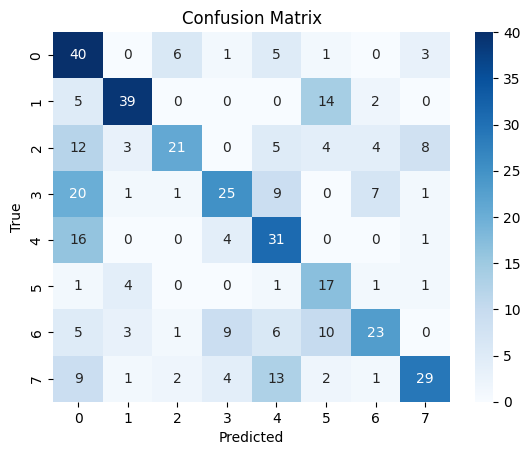

In [179]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [180]:
train_loss , train_acc  = model.evaluate(x = X_train , y = Y_train ) 
test_loss , test_acc = model.evaluate( x = X_test , y = Y_test ) 

14/14 [==============================] - 0s 5ms/step - loss: 2.3547 - accuracy: 0.5208


In [181]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.8859127163887024
Testing accuracy is :  0.5208333134651184


### SVM

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


svm_model = SVC( random_state = 8)

# Define the hyperparameter space to explore
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
# Define the grid search object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)


print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.6481481481481481
Training accuracy:  1.0
Best hyperparameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [183]:
y_pred.shape

(432,)

In [184]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[41  0  7  0  1  1  2  4]
 [ 1 46  1  0  0  7  5  0]
 [ 4  2 38  2  2  1  2  6]
 [13  1  1 37  2  3  3  4]
 [ 2  2  1  8 32  0  2  5]
 [ 0  6  0  0  1 16  0  2]
 [ 1  3  1 11  3  3 33  2]
 [ 7  0  5  2  4  3  3 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.73      0.66        56
           1       0.77      0.77      0.77        60
           2       0.70      0.67      0.68        57
           3       0.62      0.58      0.60        64
           4       0.71      0.62      0.66        52
           5       0.47      0.64      0.54        25
           6       0.66      0.58      0.62        57
           7       0.62      0.61      0.61        61

    accuracy                           0.65       432
   macro avg       0.64      0.65      0.64       432
weighted avg       0.65      0.65      0.65       432

Accuracy:  0.6481481481481481


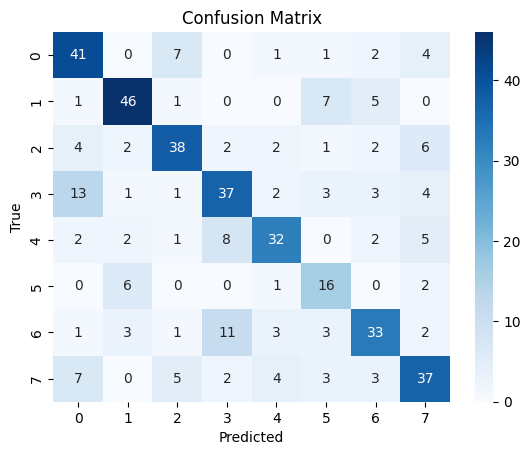

In [185]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [186]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  1.0
Testing accuracy is :  0.6481481481481481


### DECISION TREE CLASSIFIER

In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter space to explore
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.3101851851851852
Training accuracy:  0.7738095238095238
Best hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [188]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[26  0  8  5  7  0  1  9]
 [ 1 24  3  3  5 11 12  1]
 [ 4  6 24  9  5  0  2  7]
 [13  5 10 16  8  1  2  9]
 [ 8  2  8 14  7  1  5  7]
 [ 1  6  4  0  1  4  5  4]
 [ 2 13  3  7  8  4 16  4]
 [ 4  5 17  3 12  1  2 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.46      0.45        56
           1       0.39      0.40      0.40        60
           2       0.31      0.42      0.36        57
           3       0.28      0.25      0.26        64
           4       0.13      0.13      0.13        52
           5       0.18      0.16      0.17        25
           6       0.36      0.28      0.31        57
           7       0.29      0.28      0.29        61

    accuracy                           0.31       432
   macro avg       0.30      0.30      0.30       432
weighted avg       0.31      0.31      0.31       432

Accuracy:  0.3101851851851852


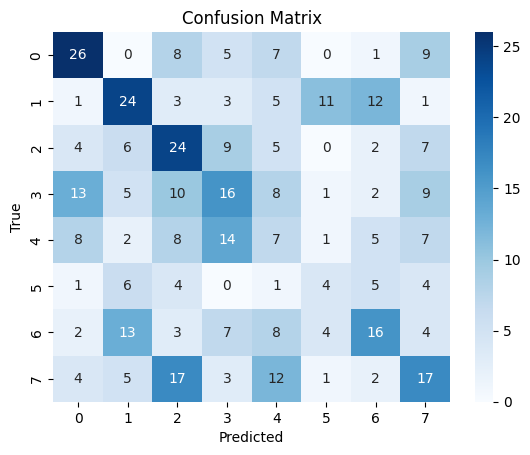

In [189]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [190]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.7738095238095238
Testing accuracy is :  0.3101851851851852


### RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the random forest classifier model
rf_model = RandomForestClassifier(random_state=8)

# Define the hyperparameter space to explore
param_grid = {
    'n_estimators': [ 100 , 200 , 500 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 10, 15, 20],
    'criterion' :['gini', 'entropy']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


In [ ]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

### BAGGING 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# # Generate some random data
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=8)

# # Split data into train and test sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# # Define the base estimator to use
base_estimator = DecisionTreeClassifier(random_state=8)

# Define the hyperparameter space to explore
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    'base_estimator__max_depth': [5, 10, 15],
}

# Define the bagging classifier to use
bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=8)

# Define the grid search object
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


In [ ]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

### KNN

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter space to explore
param_grid = {
    'n_neighbors': [2,3, 4,5,6, 7,8, 9 , 10  ],
    'p': [1, 2],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.5787037037037037
Training accuracy:  0.8412698412698413
Best hyperparameters:  {'n_neighbors': 2, 'p': 1}


In [195]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[40  1  6  2  6  0  0  1]
 [ 1 53  0  0  1  5  0  0]
 [ 8  7 35  1  2  3  1  0]
 [ 4  4 12 34  3  2  2  3]
 [ 5  5  6  9 25  1  1  0]
 [ 1  5  0  0  0 18  0  1]
 [ 1  9  5  9  4  5 22  2]
 [ 4  1 11  6 10  3  3 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.67        56
           1       0.62      0.88      0.73        60
           2       0.47      0.61      0.53        57
           3       0.56      0.53      0.54        64
           4       0.49      0.48      0.49        52
           5       0.49      0.72      0.58        25
           6       0.76      0.39      0.51        57
           7       0.77      0.38      0.51        61

    accuracy                           0.58       432
   macro avg       0.60      0.59      0.57       432
weighted avg       0.61      0.58      0.57       432

Accuracy:  0.5787037037037037


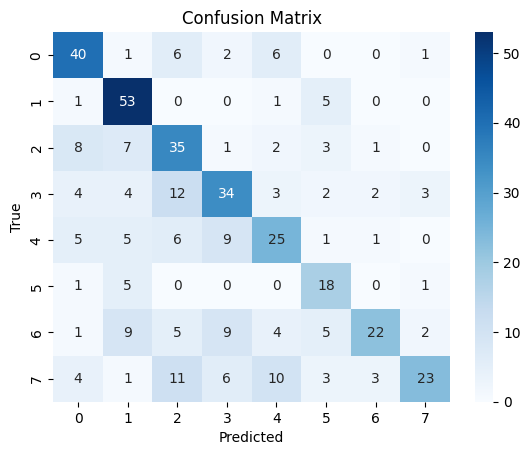

In [196]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

# WITH AUDIO AUGMENTATION

### AUDIO AUGMENTATION

In [197]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# # STRETCH
# def stretch(data, rate=0.8):
#     return librosa.effects.time_stretch(data,rate =  rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr = sampling_rate,n_steps =  pitch_factor)

In [198]:
def feat_ext(data , sample_rate):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext(data , sample_rate)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext(noise_data , sample_rate)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext(data_stretch_pitch , sample_rate)
    result = np.vstack((result, res3))
    return result

In [199]:
X = []  
y = [] 
i = 0 
for file in audio_files: 
  f = get_feat(file) 
  for e in f: 
    X.append(e)   
    y.append(Y['Emotion'][i]) 
  i+=1 
X = np.array(X) 
y = np.array(y)

In [200]:
print(X.shape) 
print(y.shape)

(4320, 20)
(4320,)


In [201]:
y = pd.DataFrame(y , columns = ['Emotions']) 
y.head()

,Emotions
0,1
1,1
2,1
3,5
4,5


In [202]:
y = pd.get_dummies(y , columns = ['Emotions']) 
y.head()

,Emotions_0,Emotions_1,Emotions_2,Emotions_3,Emotions_4,Emotions_5,Emotions_6,Emotions_7
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [203]:
y = np.array(y)

In [255]:
X_train , X_test , Y_train , Y_test = training_testing_splitting(X , y ) 


In [256]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [257]:
Y_train = np.array(Y_train ) 
Y_test = np.array(Y_test)

In [258]:
y_train = np.argmax(Y_train , axis = 1) 
y_test = np.argmax(Y_test , axis = 1) 
y_train.shape

(3024,)

In [208]:
pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### ANN

In [229]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=32, max_value=512, step=16),
                           input_shape=(20,),
                           activation=hp.Choice('activation1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.05)))

    # Add hidden layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=10)
    for i in range(num_layers):
        model.add(layers.Dense(units=hp.Int(f'units{i+2}', min_value=16 , max_value=512, step=8),
                               activation=hp.Choice(f'activation{i+2}', values=['relu', 'tanh', 'sigmoid'])))
        model.add(layers.Dropout(rate=hp.Float(f'dropout{i+2}', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units= 8 , activation='softmax'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4  , 1e-5 , 1e-6]))
    elif optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4 , 1e-5 , 1e-6]))
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4 , 1e-5 , 1e-6]))
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 50)

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='my_project')

# Search for the best hyperparameters
tuner.search(x=X_train, y=Y_train,
             epochs=50,
             validation_data=(X_test, Y_test) , callbacks = [early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)

# Build the model with the best hyperparameters
model = build_model(best_hps)

# Train the model on the full dataset
history = model.fit(x=X_train, y=Y_train,
                    epochs= 500,
                    batch_size=32,
                    validation_data=(X_test, Y_test) , callbacks = [early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x=X_test, y=Y_test)
print('Test accuracy:', test_acc)


Epoch 1/500
95/95 [==============================] - 2s 8ms/step - loss: 1.8002 - accuracy: 0.3069 - val_loss: 1.6119 - val_accuracy: 0.3904
Epoch 2/500
95/95 [==============================] - 0s 4ms/step - loss: 1.6449 - accuracy: 0.3743 - val_loss: 1.4892 - val_accuracy: 0.4421
Epoch 3/500
95/95 [==============================] - 0s 5ms/step - loss: 1.5826 - accuracy: 0.3912 - val_loss: 1.4278 - val_accuracy: 0.4738
Epoch 4/500
95/95 [==============================] - 1s 6ms/step - loss: 1.5395 - accuracy: 0.4127 - val_loss: 1.4040 - val_accuracy: 0.4761
Epoch 5/500
95/95 [==============================] - 1s 6ms/step - loss: 1.5213 - accuracy: 0.4157 - val_loss: 1.3705 - val_accuracy: 0.4931
Epoch 6/500
95/95 [==============================] - 0s 5ms/step - loss: 1.4984 - accuracy: 0.4358 - val_loss: 1.3429 - val_accuracy: 0.4892
Epoch 7/500
95/95 [==============================] - 0s 5ms/step - loss: 1.4554 - accuracy: 0.4411 - val_loss: 1.3698 - val_accuracy: 0.5031
Epoch 8/500
9

In [230]:
best_hps.values

{'units1': 256,
 'activation1': 'relu',
 'dropout1': 0.4,
 'units2': 64,
 'activation2': 'relu',
 'dropout2': 0.30000000000000004,
 'learning_rate': 0.01,
 'num_layers': 1,
 'optimizer': 'adam'}

In [231]:
Y_pred = model.predict(X_test) 
Y_pred = np.argmax(Y_pred , axis = 1)


41/41 [==============================] - 0s 2ms/step


In [232]:
print(best_hps.values)

{'units1': 256, 'activation1': 'relu', 'dropout1': 0.4, 'units2': 64, 'activation2': 'relu', 'dropout2': 0.30000000000000004, 'learning_rate': 0.01, 'num_layers': 1, 'optimizer': 'adam'}


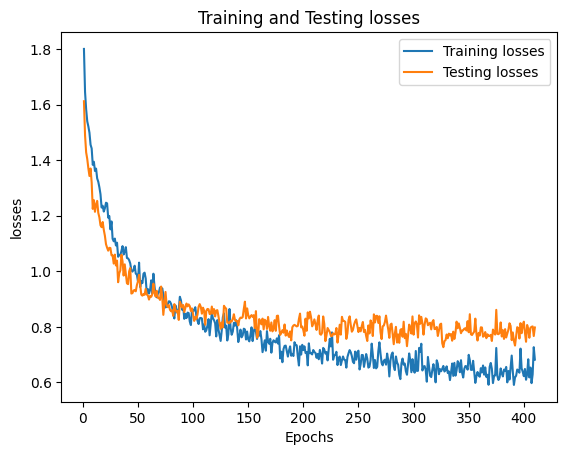

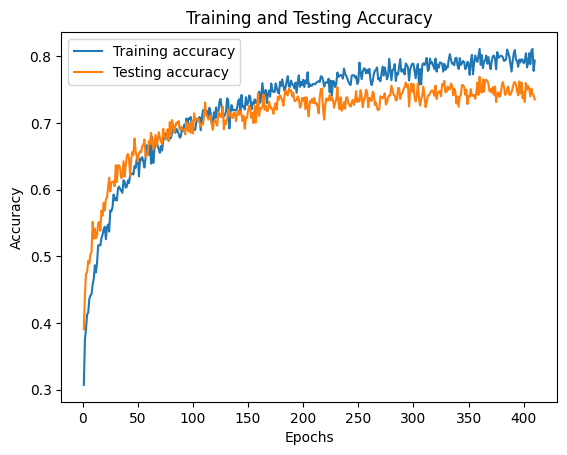

In [233]:
import matplotlib.pyplot as plt

# Train and test losses
train_losses = history.history['loss']
test_losses = history.history['val_loss']

# Train and test accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_losses) + 1)

# Plot losses
plt.plot(epochs, train_losses, label='Training losses')
plt.plot(epochs, test_losses , label='Testing losses')
plt.title('Training and Testing losses')
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.legend()

# Show plot
plt.show()

# Plot accuracy
plt.plot(epochs, train_acc , label='Training accuracy')
plt.plot(epochs, test_acc,  label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


In [234]:
# y_test: true labels, Y_pred: predicted labels
cm = confusion_matrix(y_test, Y_pred)
cr = classification_report(y_test, Y_pred)
acc = accuracy_score(y_test, Y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[131   0  14   2  10   1  11   2]
 [  0 137   3   2   2   8  20   0]
 [  4   0 123   4   4   5  16   3]
 [  6   1   6 139   7   0  23   5]
 [  8   3   4  15 107   0  24   2]
 [  0  11   0   1   2  51  26   1]
 [  0  10   9  11   1   8 142   2]
 [  0   5   9   9   9   5   9 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       171
           1       0.82      0.80      0.81       172
           2       0.73      0.77      0.75       159
           3       0.76      0.74      0.75       187
           4       0.75      0.66      0.70       163
           5       0.65      0.55      0.60        92
           6       0.52      0.78      0.63       183
           7       0.89      0.73      0.80       169

    accuracy                           0.74      1296
   macro avg       0.75      0.72      0.73      1296
weighted avg       0.76      0.74      0.74      1296

Accuracy:  0.735339506172

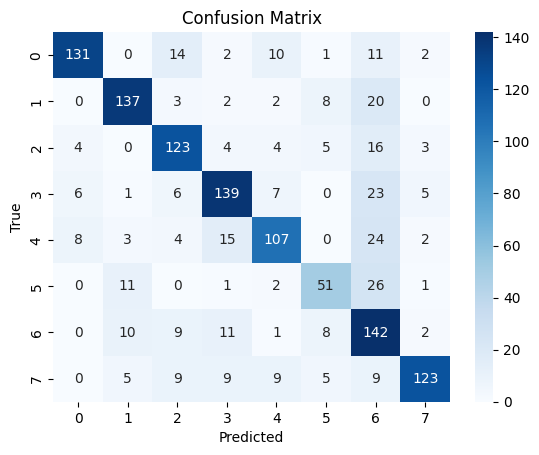

In [235]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [236]:
train_loss , train_acc  = model.evaluate(x = X_train , y = Y_train ) 
test_loss , test_acc = model.evaluate( x = X_test , y = Y_test ) 

41/41 [==============================] - 0s 2ms/step - loss: 0.7977 - accuracy: 0.7353


In [237]:
print("Training accuracy is : " , train_acc) 
print("Testing accuracy is : " , test_acc) 

Training accuracy is :  0.932539701461792
Testing accuracy is :  0.7353395223617554


In [238]:
from joblib import dump

In [239]:
dump(model, '/content/ann_final.joblib')

['/content/ann_final.joblib']

### SVM

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


svm_model = SVC( random_state = 8)

# Define the hyperparameter space to explore
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
# Define the grid search object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred) 
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)


print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.7175925925925926
Training accuracy:  0.9821428571428571
Best hyperparameters:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [210]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[134   0  19   5   7   1   3   2]
 [  0 143   6   1   1  10   9   2]
 [ 18   4 116   2   2   4   3  10]
 [ 10   4   8 135  13   0   5  12]
 [  6   6  11  17 110   2   5   6]
 [  0  14   2   1   2  61   9   3]
 [  2  21  10  21  10   6 108   5]
 [  4   0  15   5  10   6   6 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       171
           1       0.74      0.83      0.79       172
           2       0.62      0.73      0.67       159
           3       0.72      0.72      0.72       187
           4       0.71      0.67      0.69       163
           5       0.68      0.66      0.67        92
           6       0.73      0.59      0.65       183
           7       0.75      0.73      0.74       169

    accuracy                           0.72      1296
   macro avg       0.72      0.72      0.71      1296
weighted avg       0.72      0.72      0.72      1296

Accuracy:  0.717592592592

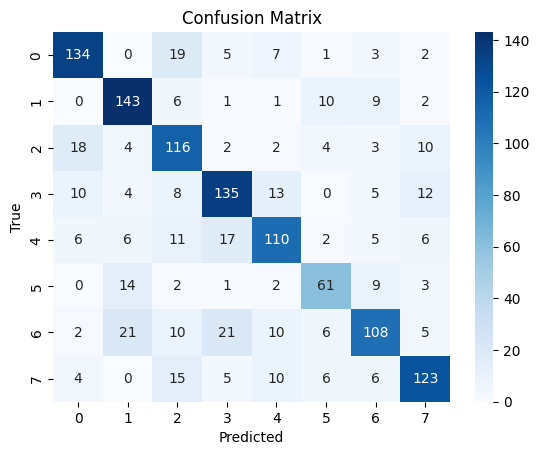

In [211]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

### DECISION TREE CLASSIFIER

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter space to explore
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred) 
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)


print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.3904320987654321
Training accuracy:  0.9203042328042328
Best hyperparameters:  {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [213]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[82  2 23 12 27  2  5 18]
 [ 3 77 16  8  8 20 24 16]
 [18 12 63 14 18  5  9 20]
 [22  6 14 75 28  4 17 21]
 [19  6 20 11 61  9 15 22]
 [ 0 16 10  5  7 31 16  7]
 [10 27 20 18 20 14 52 22]
 [14  8 29 15 21  6 11 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.48       171
           1       0.50      0.45      0.47       172
           2       0.32      0.40      0.36       159
           3       0.47      0.40      0.43       187
           4       0.32      0.37      0.35       163
           5       0.34      0.34      0.34        92
           6       0.35      0.28      0.31       183
           7       0.34      0.38      0.36       169

    accuracy                           0.39      1296
   macro avg       0.39      0.39      0.39      1296
weighted avg       0.40      0.39      0.39      1296

Accuracy:  0.3904320987654321


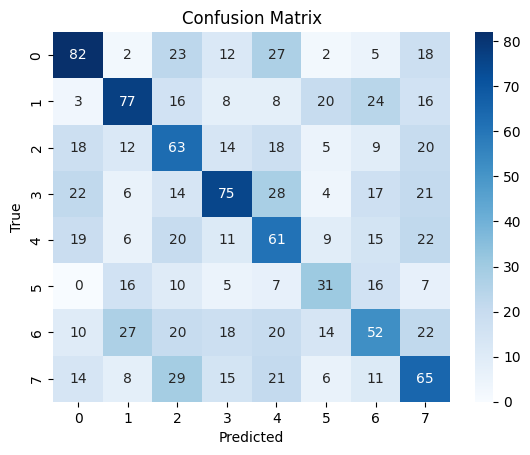

In [214]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

### KNN

In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter space to explore
param_grid = {
    'n_neighbors': [2,3, 4,5,6, 7,8, 9 , 10  ],
    'p': [1, 2],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)


print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


Testing accuracy: 0.6003086419753086
Training accuracy:  0.8373015873015873
Best hyperparameters:  {'n_neighbors': 2, 'p': 2}


#### MM

In [216]:
# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("Accuracy: ", acc)


Confusion Matrix:
 [[137   7  11   4   7   0   2   3]
 [  2 143   5   6   5   8   3   0]
 [ 20  19  98   8   7   2   3   2]
 [ 20   7  25 120   8   1   3   3]
 [ 14  12  19  18  84   6   8   2]
 [  2  28   6   3   2  47   3   1]
 [  7  35  18  23  23  13  64   0]
 [ 13   5  15  18  15   8  10  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.80      0.71       171
           1       0.56      0.83      0.67       172
           2       0.50      0.62      0.55       159
           3       0.60      0.64      0.62       187
           4       0.56      0.52      0.54       163
           5       0.55      0.51      0.53        92
           6       0.67      0.35      0.46       183
           7       0.89      0.50      0.64       169

    accuracy                           0.60      1296
   macro avg       0.62      0.60      0.59      1296
weighted avg       0.62      0.60      0.59      1296

Accuracy:  0.600308641975

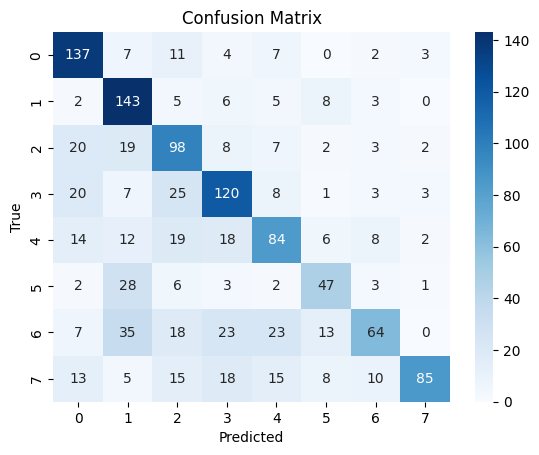

In [217]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()

### RANDOM FOREST CLASSIFIER

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the random forest classifier model
rf_model = RandomForestClassifier(random_state=8)

# Define the hyperparameter space to explore
param_grid = {
    'n_estimators': [ 100 , 200 , 500 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 10, 15, 20],
    'criterion' :['gini', 'entropy']
}

# Define the grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)


print("Testing accuracy:", test_acc)
print("Training accuracy: ", train_acc)
print("Best hyperparameters: ", best_params)


### ANN with PCA

In [245]:
from sklearn.decomposition import PCA

In [259]:
pca = PCA(n_components = 0.99) 
pca.fit(X_train) 
X_train = pca.transform(X_train) 
X_test = pca.transform(X_test) 
X_train.shape

(3024, 17)

In [260]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=32, max_value=512, step=16),
                           input_shape=(17,),
                           activation=hp.Choice('activation1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.05)))

    # Add hidden layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=10)
    for i in range(num_layers):
        model.add(layers.Dense(units=hp.Int(f'units{i+2}', min_value=16 , max_value=512, step=8),
                               activation=hp.Choice(f'activation{i+2}', values=['relu', 'tanh', 'sigmoid'])))
        model.add(layers.Dropout(rate=hp.Float(f'dropout{i+2}', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units= 8 , activation='softmax'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4  , 1e-5 , 1e-6]))
    elif optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4 , 1e-5 , 1e-6]))
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3, 1e-4 , 1e-5 , 1e-6]))
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 50)

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='my_project')

# Search for the best hyperparameters
tuner.search(x=X_train, y=Y_train,
             epochs=50,
             validation_data=(X_test, Y_test) , callbacks = [early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)

# Build the model with the best hyperparameters
model = build_model(best_hps)

# Train the model on the full dataset
history = model.fit(x=X_train, y=Y_train,
                    epochs= 500,
                    batch_size=32,
                    validation_data=(X_test, Y_test) , callbacks = [early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x=X_test, y=Y_test)
print('Test accuracy:', test_acc)


Epoch 1/500
95/95 [==============================] - 4s 17ms/step - loss: 1.8007 - accuracy: 0.3221 - val_loss: 1.5389 - val_accuracy: 0.4198
Epoch 2/500
95/95 [==============================] - 1s 10ms/step - loss: 1.6306 - accuracy: 0.3839 - val_loss: 1.4922 - val_accuracy: 0.4545
Epoch 3/500
95/95 [==============================] - 1s 10ms/step - loss: 1.5756 - accuracy: 0.4173 - val_loss: 1.4039 - val_accuracy: 0.4776
Epoch 4/500
95/95 [==============================] - 1s 6ms/step - loss: 1.5450 - accuracy: 0.4342 - val_loss: 1.4107 - val_accuracy: 0.4954
Epoch 5/500
95/95 [==============================] - 1s 5ms/step - loss: 1.5202 - accuracy: 0.4405 - val_loss: 1.3517 - val_accuracy: 0.5039
Epoch 6/500
95/95 [==============================] - 1s 6ms/step - loss: 1.4673 - accuracy: 0.4534 - val_loss: 1.3213 - val_accuracy: 0.5116
Epoch 7/500
95/95 [==============================] - 1s 6ms/step - loss: 1.4551 - accuracy: 0.4514 - val_loss: 1.2973 - val_accuracy: 0.5201
Epoch 8/50

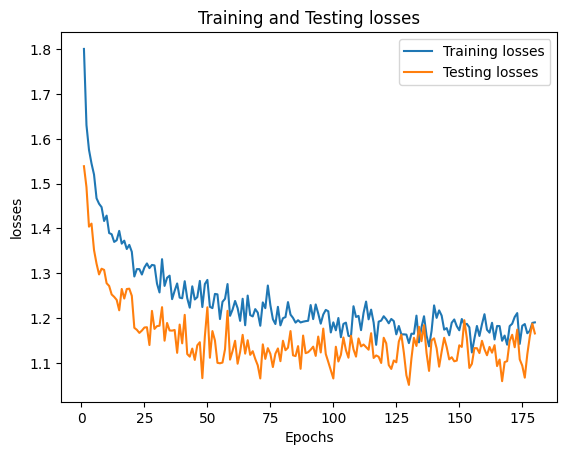

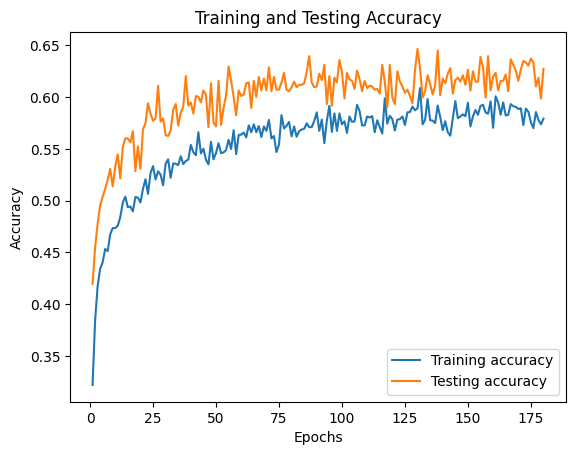

In [261]:
import matplotlib.pyplot as plt

# Train and test losses
train_losses = history.history['loss']
test_losses = history.history['val_loss']

# Train and test accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_losses) + 1)

# Plot losses
plt.plot(epochs, train_losses, label='Training losses')
plt.plot(epochs, test_losses , label='Testing losses')
plt.title('Training and Testing losses')
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.legend()

# Show plot
plt.show()

# Plot accuracy
plt.plot(epochs, train_acc , label='Training accuracy')
plt.plot(epochs, test_acc,  label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()
